# Mini Project 3: Machine Learning For Analysis And Prediction

#### Created by Group 4 - Alberte & Felicia

This notebook analyzes the IBM HR Employee Attrition dataset. We apply machine learning techniques to answer key questions about employee behavior, particularly focusing on attrition, salary prediction, and clustering. The code is organized and annotated for reproducibility and educational clarity.

## Project Objectives and Task Breakdown

**Assignment Objective**:
> Understand why employees leave a company and predict attrition, income, and cluster employee profiles using regression, classification, and clustering.

**Tasks**:
1. Data wrangling and exploration  
2. Regression (predict `MonthlyIncome`)  
3. Classification (predict `Attrition`)  
4. Clustering (unsupervised grouping of employees)  
5. Deployment for app use (optional)

Each section includes code, output, explanations, and summaries.

## Dataset Handling and Versioning During Preprocessing

To manage our data efficiently and minimize errors during preprocessing, we created multiple versions of the dataset at different stages of transformation. Each version serves a distinct purpose and allows us to reuse or revisit specific stages of the pipeline without repeating earlier steps.

- **`df_raw`**: The original dataset loaded from the CSV file. This version remains unchanged and serves as the source of truth.

- **`df`**: A working copy of `df_raw` used for all cleaning, exploration, and visualization. Initial transformations such as missing value checks, visual analysis, and column inspection were done using this version.

- **`df_encoded`**: A version created after encoding all categorical variables. Binary categorical features (e.g., `Gender`, `OverTime`, `Attrition`, `Over18`) were label-encoded, while multi-class features (e.g., `JobRole`, `Department`, `MaritalStatus`, `BusinessTravel`, `EducationField`) were one-hot encoded using `drop_first=True` to avoid multicollinearity.

- **`df_clean`**: The final, fully preprocessed dataset used for modeling. This version contains:
  - Encoded categorical variables
  - Scaled numerical features (standardized using `StandardScaler`)
  - No missing or duplicate values

- **`clean_features`**: A version of `df_clean` with the target column (`MonthlyIncome`) removed. This feature-only dataset is used for tasks like prediction, deployment, or model interpretation where labels are not needed.

This structured approach to dataset handling allows us to clearly separate the stages of preprocessing and modeling. It also makes it easier to debug, reproduce results, and reuse data for different machine learning tasks including regression, classification, and clustering.

Before we begin analyzing the IBM HR dataset, we need to import a few essential Python libraries that will help us work with the data easily.

- **Pandas**: This is a powerful library used to handle and manipulate data in tables (called DataFrames).
- **NumPy**: It helps with numerical operations, especially when we work with arrays or need to do math.
- **Matplotlib** and **Seaborn**: These are popular libraries for creating visual charts and graphs. We'll use them to help us understand the data better by seeing it.
- **SciPy (stats module)**: This gives us access to statistical tools like checking if data is normally distributed.

We also set some default styles for our plots to make them look nicer and easier to read.

In [111]:
# import libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn import preprocessing as prep
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew
from scipy.stats import zscore

# Set plot styles for better visualization
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

---------------------------------------------

# 1. Data Wrangling and Exploration

### 1.1 Load and Explore the Data

In [12]:
# Define the path to the CSV dataset
file_path = '../data/IBM_HR_Employee_Attrition.csv'

# Function to load a CSV file into a DataFrame
def load_csv_to_dataframe(path):
    """
    Loads a CSV file into a pandas DataFrame.
    
    Parameters:
    - path (str): The file path to the CSV file
    
    Returns:
    - DataFrame: Loaded dataset
    """
    df_raw = pd.read_csv(path)
    return df_raw

# Load the dataset
print("Loading IBM HR Employee Attrition dataset...")
df_raw = load_csv_to_dataframe(file_path)

# Confirm the dataset was loaded
print("Dataset loaded with shape:", df_raw.shape)

# Create a working copy for processing
df = df_raw.copy()

# Set display option to show all columns
pd.set_option('display.max_columns', None)


Loading IBM HR Employee Attrition dataset...
Dataset loaded with shape: (1470, 35)


### 1.2 Understand the Structure and Quality of the Data

This section provides a structural overview of the dataset, checks for missing values, and displays summary statistics for both numerical and categorical variables.

In [15]:
# Set display option for wide datasets
pd.set_option('display.max_columns', None)

#### Dataset Structure and Data Types

This output shows the column names, data types, and non-null value counts.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### Missing Values Per Column

Here we identify any columns with missing values in the dataset.

In [21]:
missing = df.isnull().sum()
display(missing[missing > 0] if missing.sum() > 0 else "No missing values found.")

'No missing values found.'

#### Summary Statistics for Numerical Features

Descriptive statistics for all numerical columns.

In [24]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


#### Summary Statistics for Categorical Features

Descriptive statistics for all categorical (object type) columns.

In [27]:
df.describe(include='object')

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


### 1.3 Visual Exploration

In this section, we use visualizations to understand the distribution of features, identify class imbalances, and detect outliers or patterns that may be relevant for machine learning models.


#### Attrition Distribution

We begin by examining the target variable `Attrition` to understand class balance.
This chart shows the percentage of employees who stayed or left the company:

- **Still Employed** means the employee is currently working at the company (`Attrition = No`)
- **Left Company** means the employee has left, either by resignation or termination (`Attrition = Yes`)

As seen in the chart, most employees stayed, which indicates a class imbalance. This should be considered when building classification models to ensure balanced evaluation and predictions.

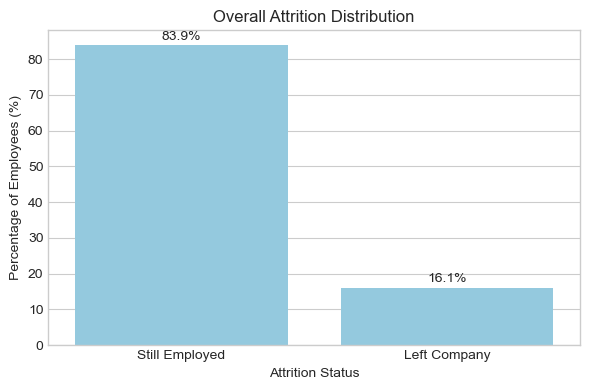

In [31]:
# Prepare data with readable labels
attrition_labeled = df['Attrition'].map({'Yes': 'Left Company', 'No': 'Still Employed'})

# Calculate percentage distribution
attrition_pct = (
    attrition_labeled.value_counts(normalize=True)
    .rename_axis('Attrition Status')
    .reset_index(name='Percentage')
)
attrition_pct['Percentage'] *= 100

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(data=attrition_pct, x='Attrition Status', y='Percentage', color='skyblue')

# Add percentage labels
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%', padding=2)

plt.title("Overall Attrition Distribution")
plt.xlabel("Attrition Status")
plt.ylabel("Percentage of Employees (%)")
plt.tight_layout()
plt.show()

#### Distribution of Numerical Features

Histograms show the spread and shape of continuous variables like Age, DistanceFromHome, MonthlyIncome, etc.

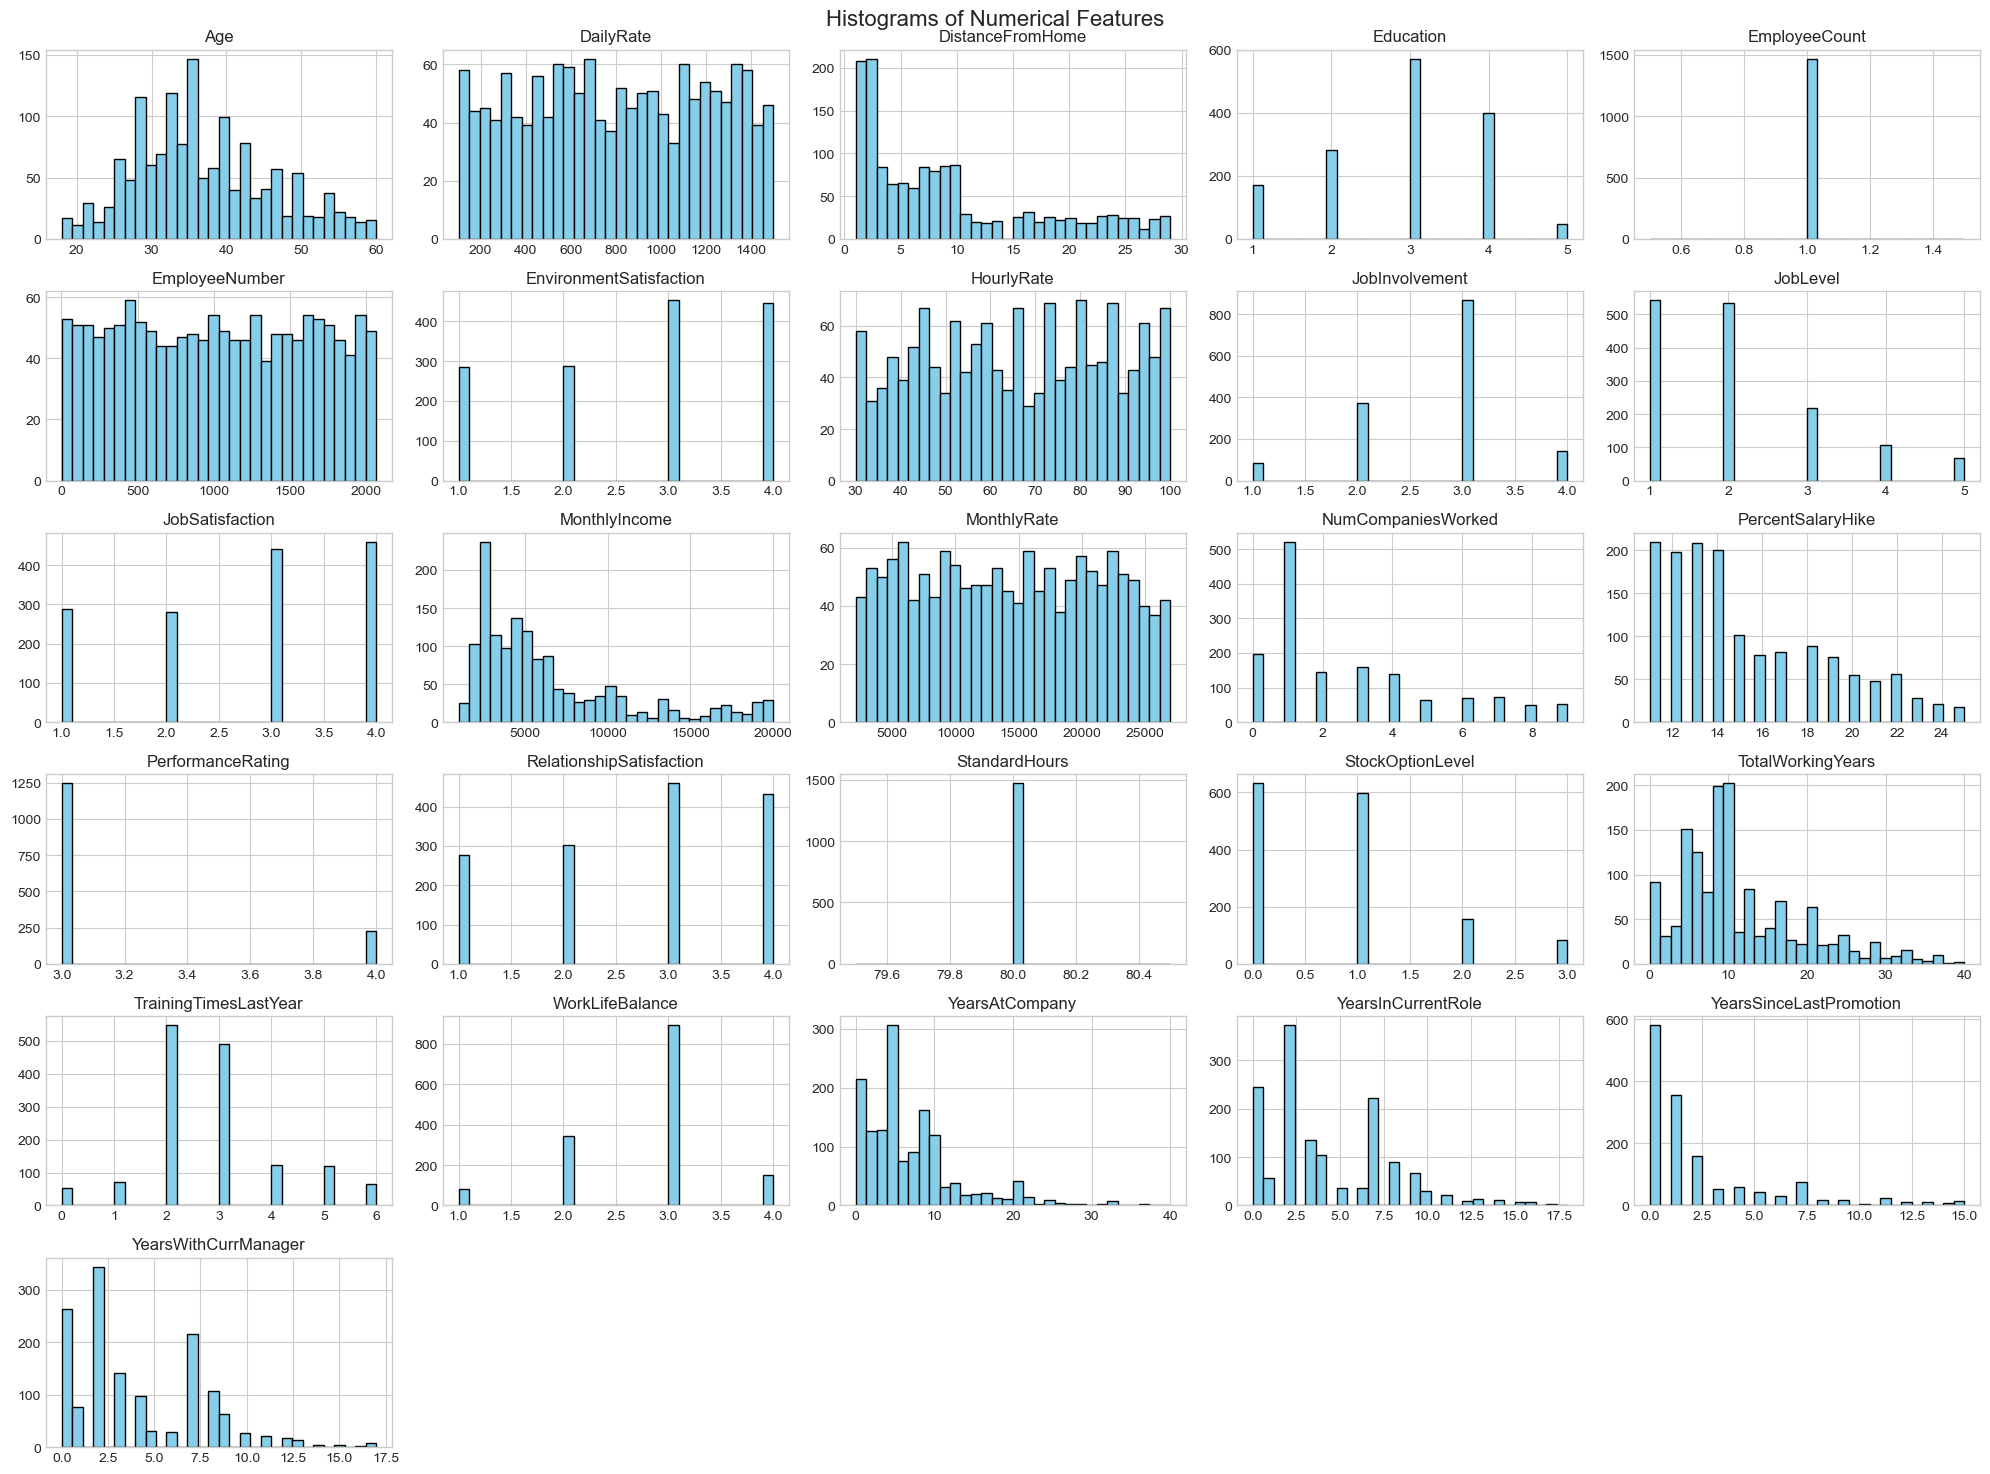

In [33]:
# Plot histograms of numeric features
df.select_dtypes(include=['int64', 'float64']).hist(figsize=(20, 15), bins=30, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


### Interpretation of Histogram Distributions

The histograms provided a good overview of how each numerical feature is distributed. Features such as `Age`, `DailyRate`, and `HourlyRate` appeared relatively uniform or normally distributed, indicating a fairly balanced spread across employees.

However, features like `MonthlyIncome`, `YearsSinceLastPromotion`, and `NumCompaniesWorked` were highly skewed to the right. This means that while most employees fall within a typical range, a smaller group stands out with very high values. These could represent long-tenured staff or employees in high-paying roles. Skewed distributions like these may impact regression results and should be monitored.


#### Boxplots to Detect Outliers

Boxplots are useful for spotting outliers, which may affect modeling.

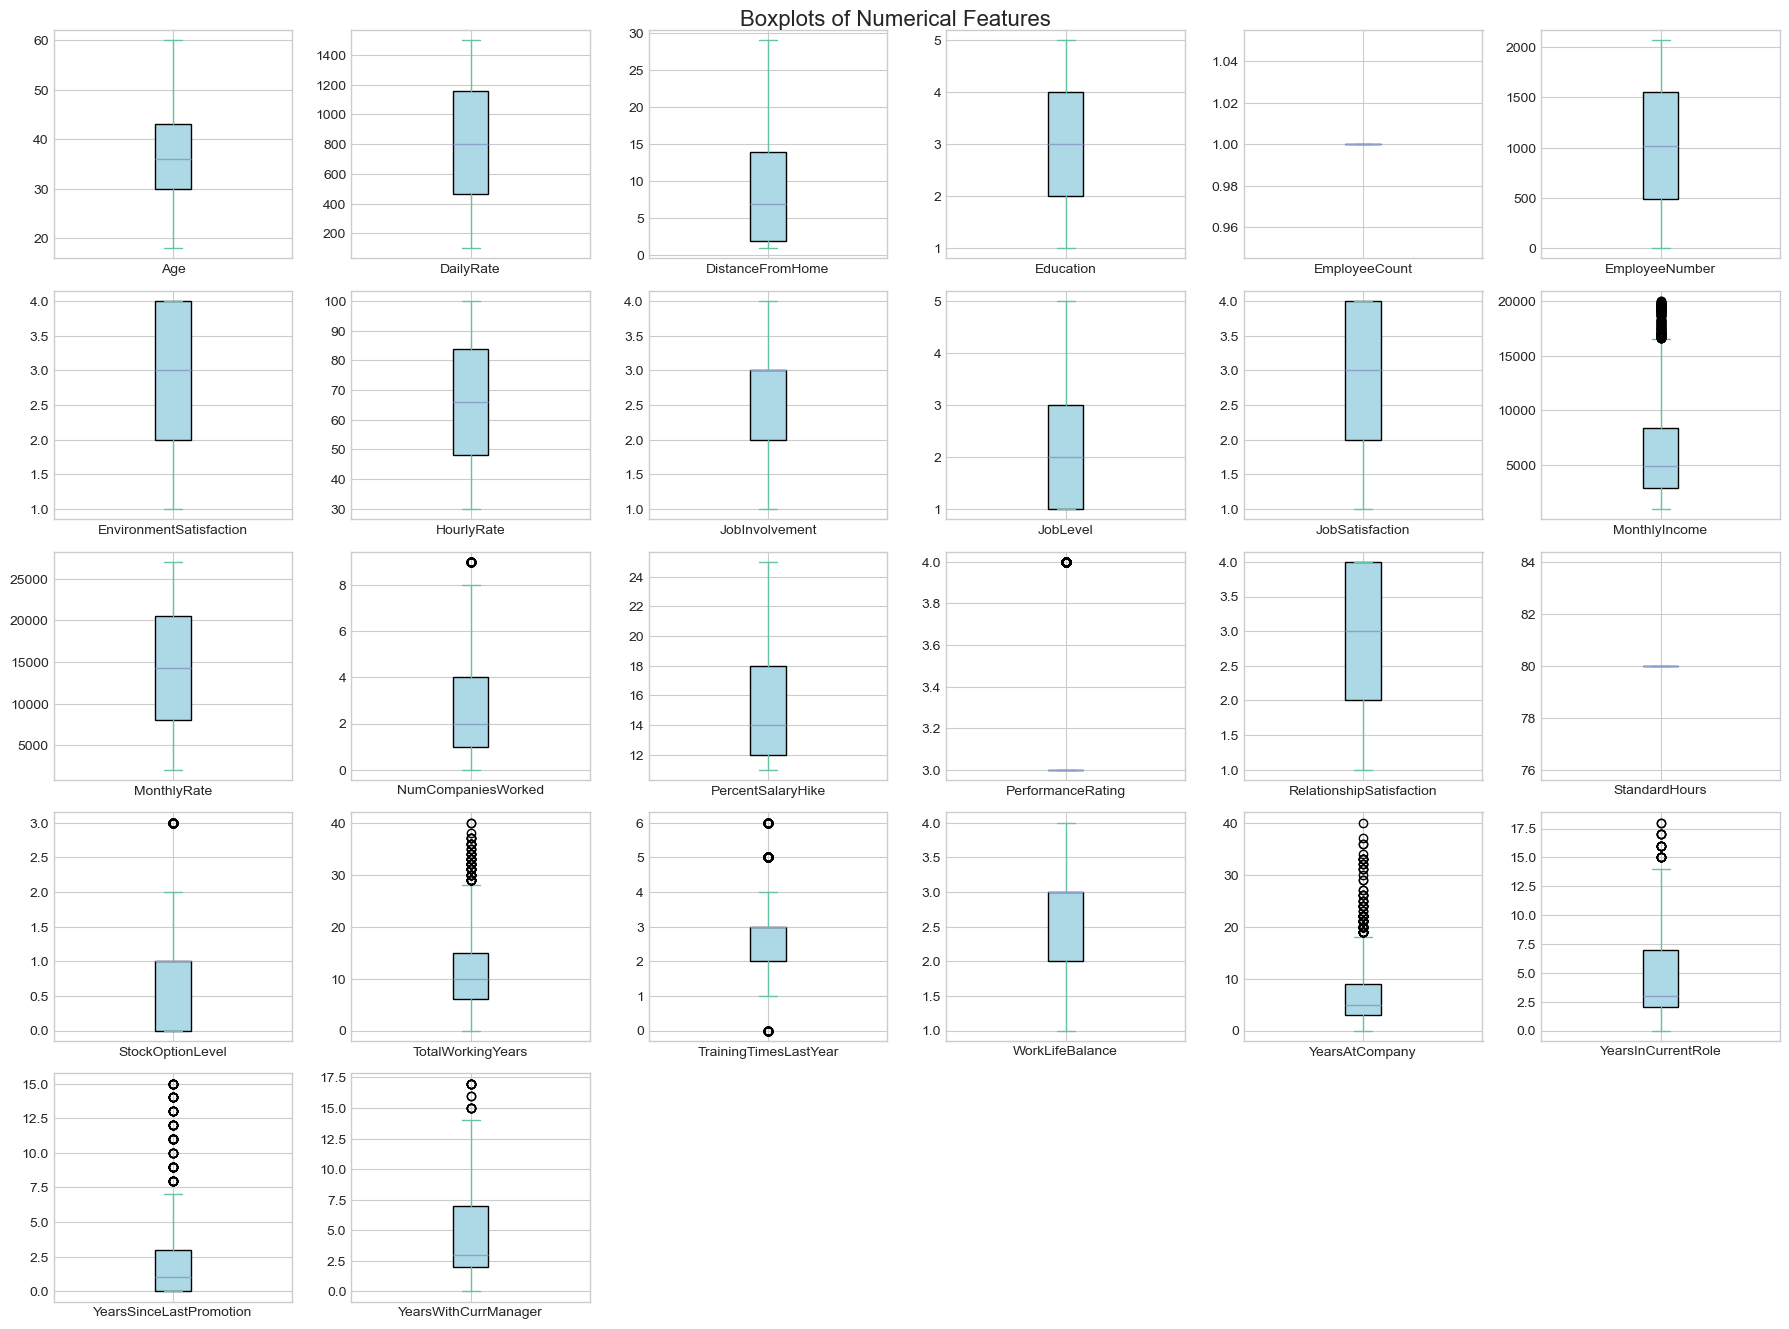

In [38]:
# Boxplot grid for numerical features
df.select_dtypes(include=['int64', 'float64']).plot(kind='box', subplots=True, layout=(6,6), figsize=(18, 16), patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.suptitle("Boxplots of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

### Outlier Detection and Interpretation

The boxplots revealed several features with significant outliers, especially `MonthlyIncome`, `YearsSinceLastPromotion`, and `TotalWorkingYears`. At first glance, these values could seem problematic, but given the context of the data, they likely represent valid cases such as high-ranking employees, individuals with long tenure, or rare promotion scenarios.

Rather than removing these data points, we chose to retain them. This preserves important variation that may reflect realistic employee profiles. If we later see that these outliers negatively influence model performance, we can consider approaches such as capping extreme values.

#### Correlation Heatmap

This shows the relationships between numerical variables and helps identify multicollinearity.

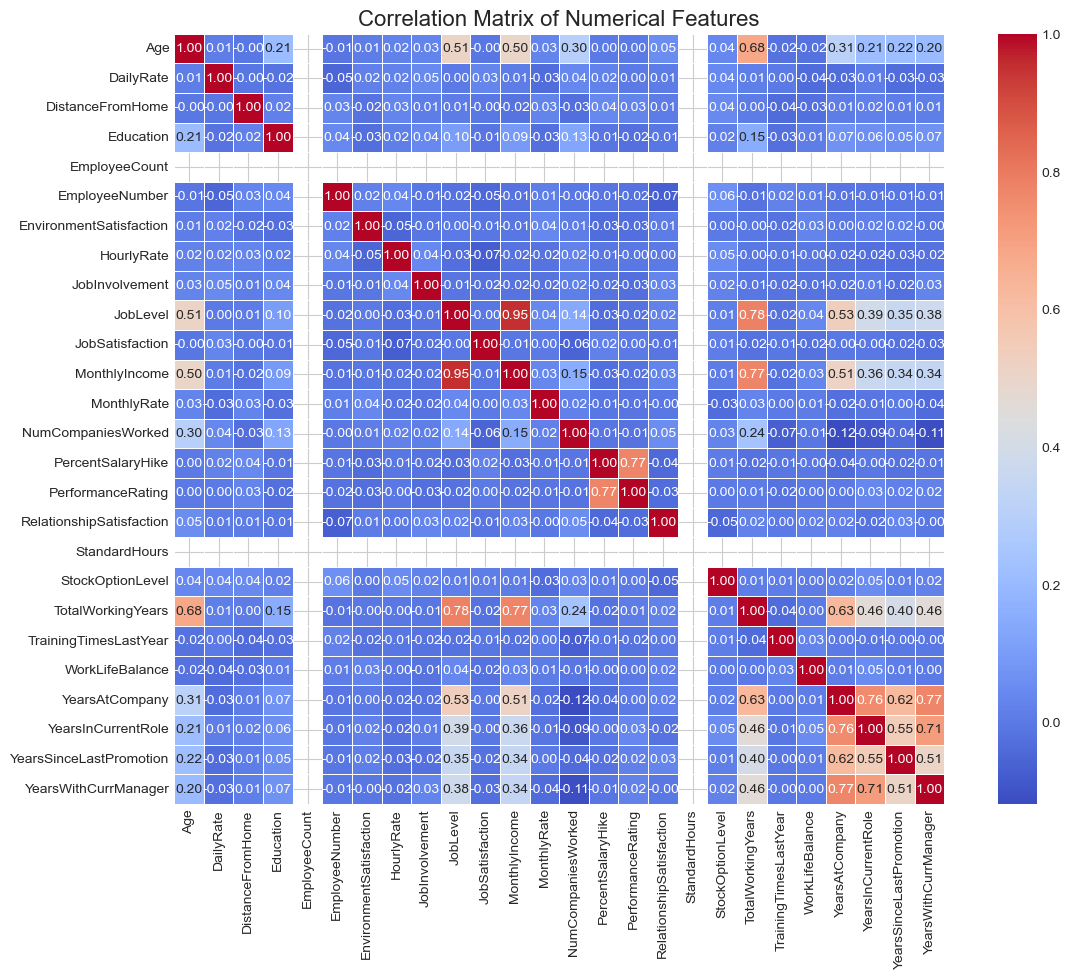

In [42]:
# Select only numerical features
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=16)
plt.show()

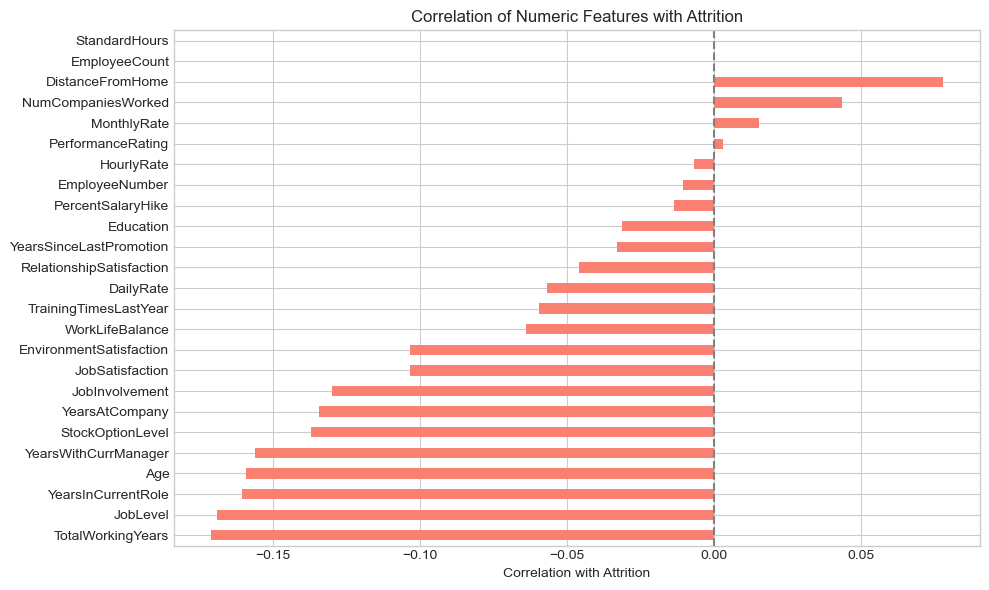

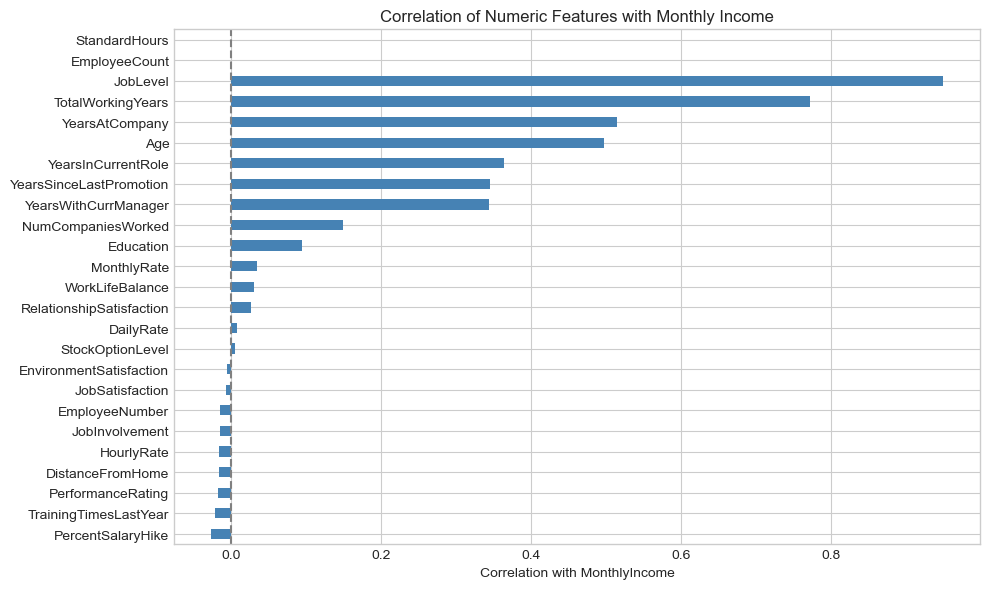

In [54]:
# Copy and encode Attrition
df_corr_target = df.copy()
if df_corr_target['Attrition'].dtype == 'object':
    df_corr_target['Attrition'] = df_corr_target['Attrition'].map({'Yes': 1, 'No': 0})

# Keep only numeric columns
numeric_df = df_corr_target.select_dtypes(include=['int64', 'float64'])

# Correlation with Attrition and MonthlyIncome
target_corr = numeric_df.corr()[['Attrition', 'MonthlyIncome']].drop(['Attrition', 'MonthlyIncome'])

# Plot: Correlation with Attrition
plt.figure(figsize=(10, 6))
target_corr['Attrition'].sort_values().plot(kind='barh', color='salmon')
plt.title("Correlation of Numeric Features with Attrition")
plt.xlabel("Correlation with Attrition")
plt.axvline(x=0, color='grey', linestyle='--')
plt.tight_layout()
plt.show()

# Plot: Correlation with MonthlyIncome
plt.figure(figsize=(10, 6))
target_corr['MonthlyIncome'].sort_values().plot(kind='barh', color='steelblue')
plt.title("Correlation of Numeric Features with Monthly Income")
plt.xlabel("Correlation with MonthlyIncome")
plt.axvline(x=0, color='grey', linestyle='--')
plt.tight_layout()
plt.show()



#### Correlation Matrix – What We Observed
The correlation matrix helped us understand how the numerical features in the dataset relate to one another. A value closer to 1 indicates a strong positive relationship, while values near 0 suggest little to no connection between features.

**Strong Relationships**

We found that `JobLevel` has a very strong correlation with `MonthlyIncome` (0.95), which makes sense since employees in higher job levels typically earn more. `TotalWorkingYears` also shows a strong positive relationship with both `JobLevel` and `MonthlyIncome`, suggesting that experience plays a major role in both promotion and salary. Additionally, `Age` is moderately correlated with `TotalWorkingYears` and `JobLevel`, reflecting the natural link between age and career progression.

**Tenure Features That Overlap**

The features `YearsAtCompany`, `YearsInCurrentRole`, and `YearsWithCurrManager` are fairly strongly correlated with each other. Since they all describe different aspects of employee tenure, it’s expected that they would overlap. However, using all of them together in a linear model may introduce redundancy. We may need to be cautious with multicollinearity or consider dimensionality reduction techniques if needed.

**Low or No Correlation**

Several features such as `JobSatisfaction`, `WorkLifeBalance`, and `EnvironmentSatisfaction` do not show strong correlations with other variables. This doesn’t necessarily mean they’re unimportant — in fact, they could be valuable predictors of outcomes like attrition, especially in models that can capture complex, non-linear relationships. Similarly, features like `DistanceFromHome`, `PercentSalaryHike`, and `NumCompaniesWorked` show weak correlations overall, but may still have value depending on the modeling approach.

**Constant Features**

Finally, we observed that `StandardHours` and `EmployeeCount` have no variation across the dataset — these values are the same for every employee. Since they don’t provide any distinguishing information, we plan to remove them from our models.


**What This Means for Our Models**
- We’ll need to pay attention to strong correlations when building regression models, so the model doesn’t get confused by duplicate information.
- Some features that don’t correlate with others may still be important in classification models (like predicting attrition), especially if we use decision trees or other non-linear models.
- Cleaning out features that are constant or clearly redundant should help simplify the model and improve performance.

### 1.4 Visualizing Categorical Features

In this section, we explore key categorical features using bar plots. We analyze both their general distribution and their relationship to employee attrition. We use countplots to see how each categorical variable is distributed in the dataset.
In our dataset, the column Attrition contains the values "Yes" and "No" — here's what they mean:

- Attrition = Yes → The employee left the company (i.e., they quit or were terminated).

- Attrition = No → The employee stayed with the company (i.e., they are still employed).

So in plots and summaries:
A high percentage of "Yes" means that more people in that group left the company.
A low percentage of "Yes" means that most people in that group stayed.

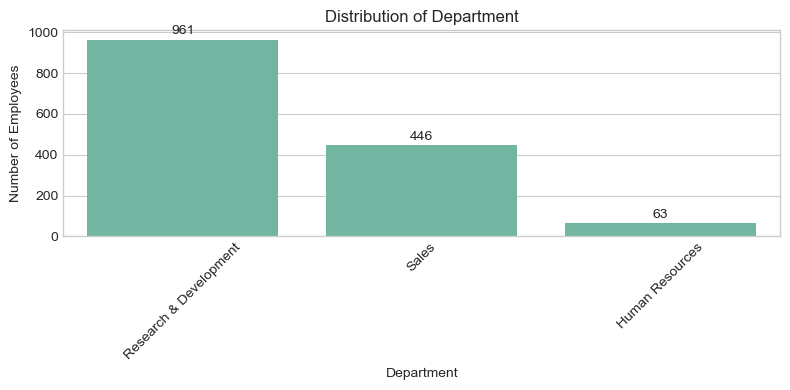

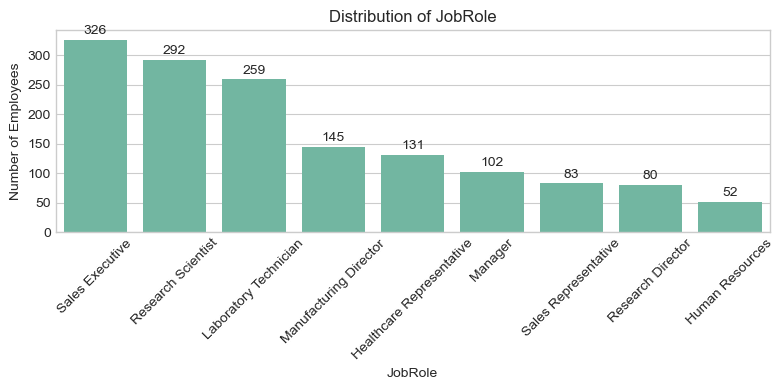

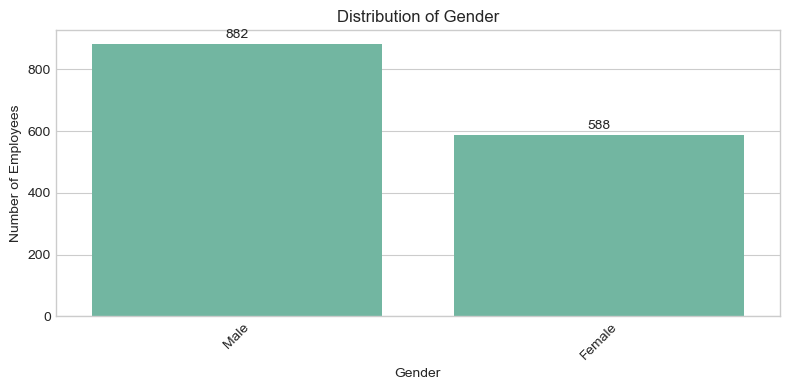

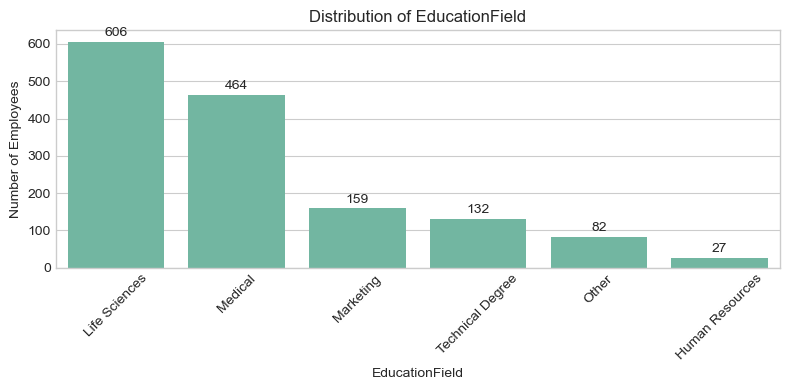

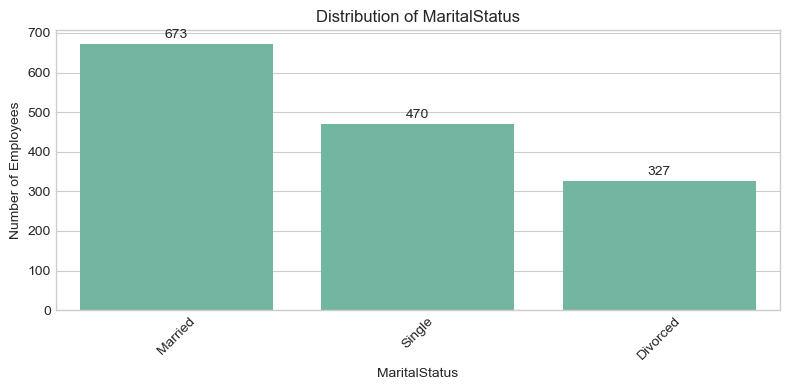

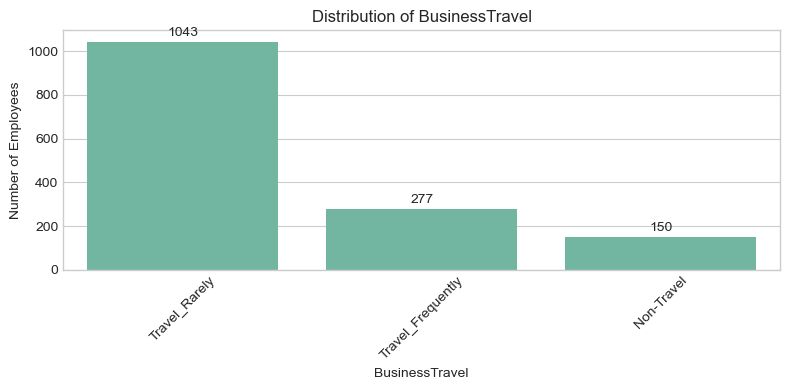

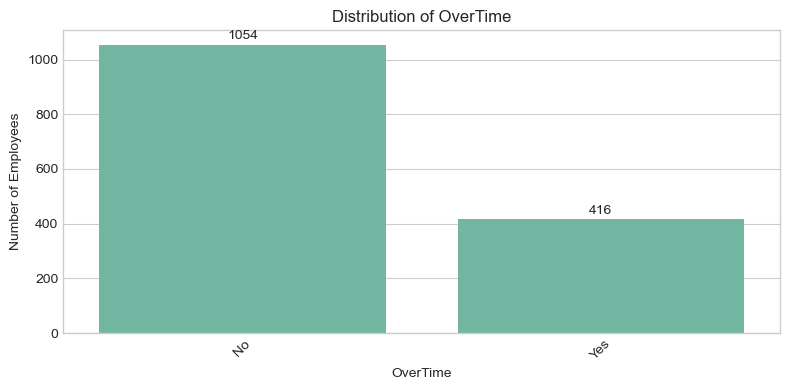

In [240]:
categorical_cols = ['Department', 'JobRole', 'Gender', 'EducationField', 'MaritalStatus', 'BusinessTravel', 'OverTime']

# Plot each categorical column with count labels
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Number of Employees")
    plt.xticks(rotation=45)

    # Add count labels on top of bars
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=2)

    plt.tight_layout()
    plt.show()


### Percentage of Employees Who Left or Stayed (by Category)

These bar plots show the percentage of employees who stayed (`Attrition = No`) or left (`Attrition = Yes`) within each group. This makes it easier to compare attrition rates across roles, departments, and other categories, even when group sizes are different.

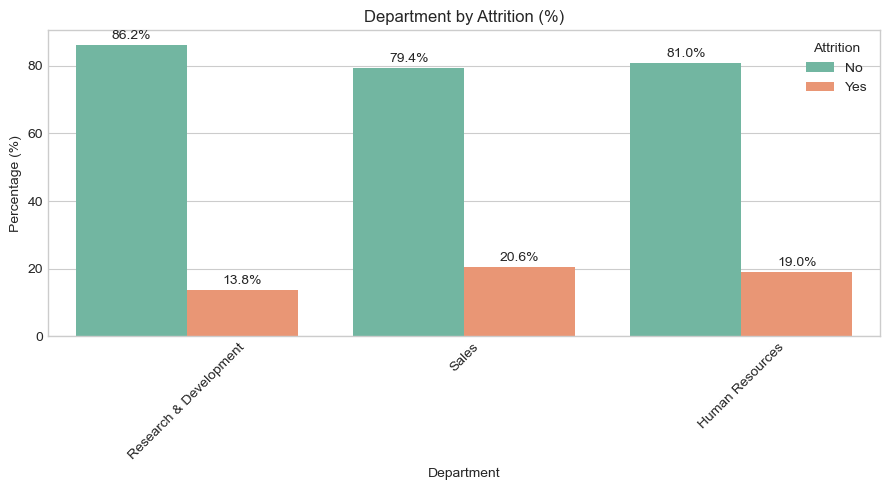

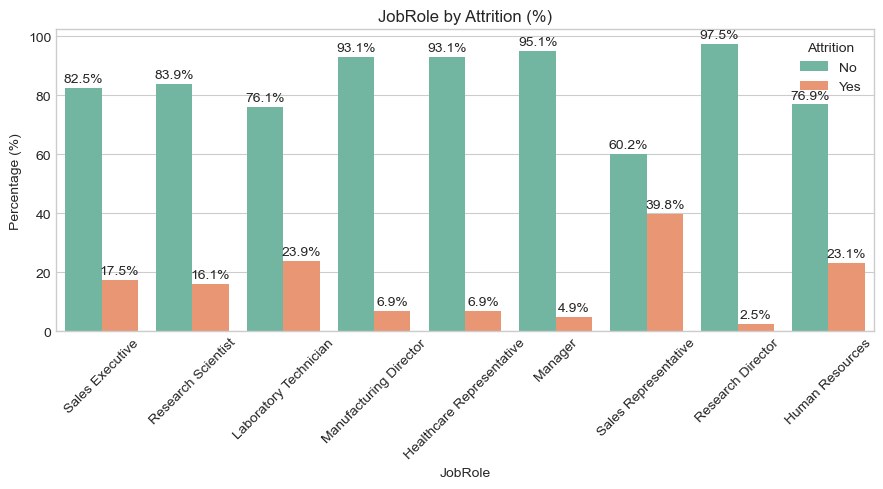

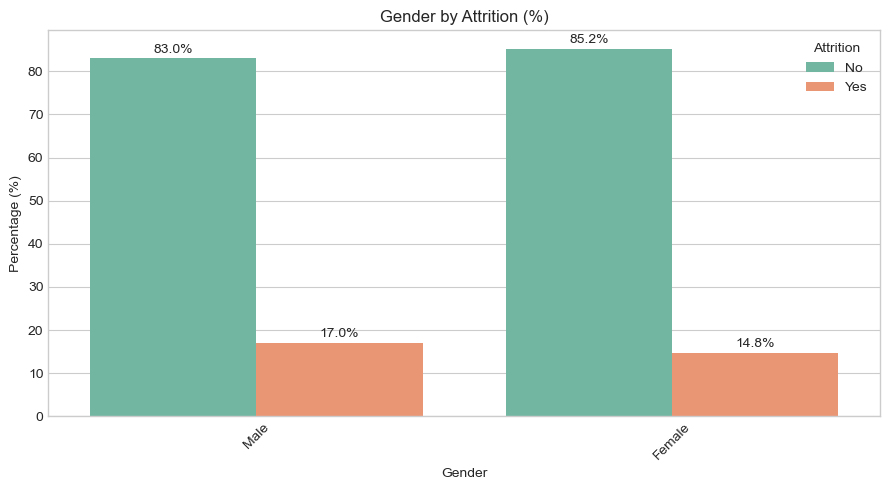

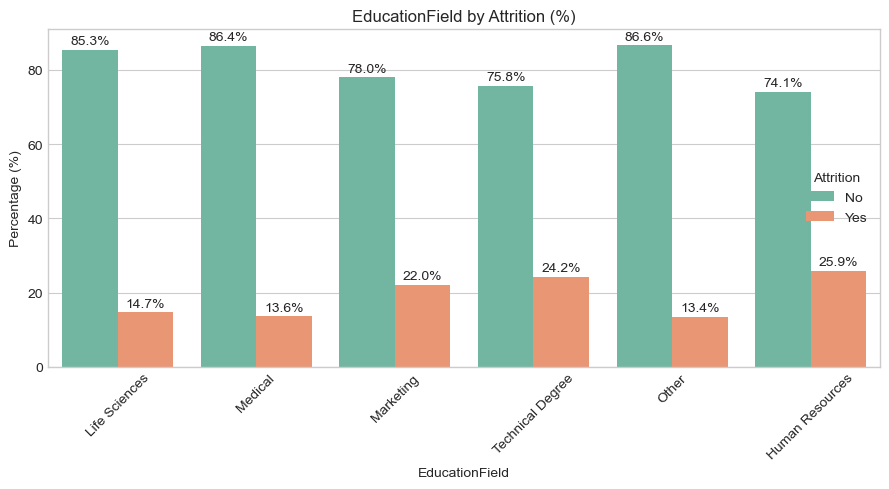

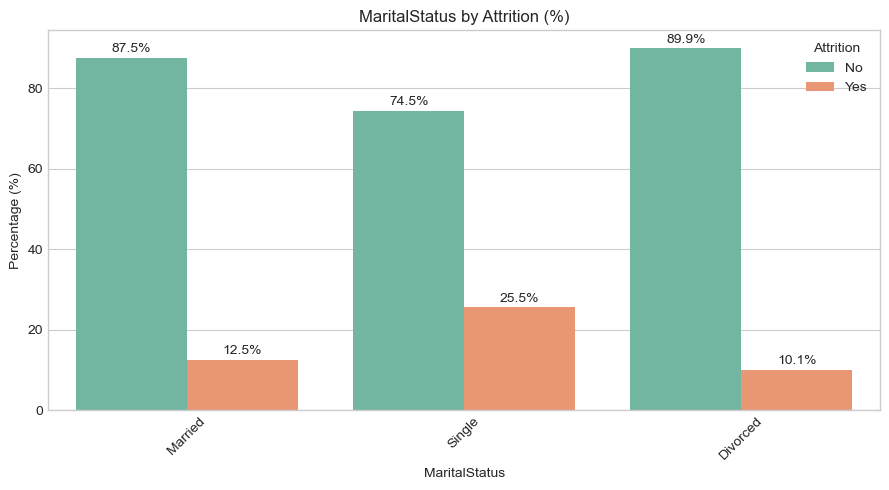

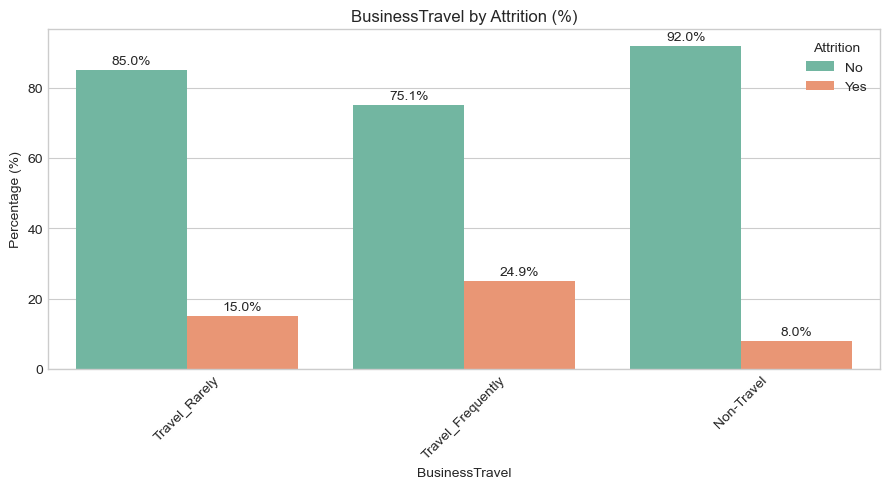

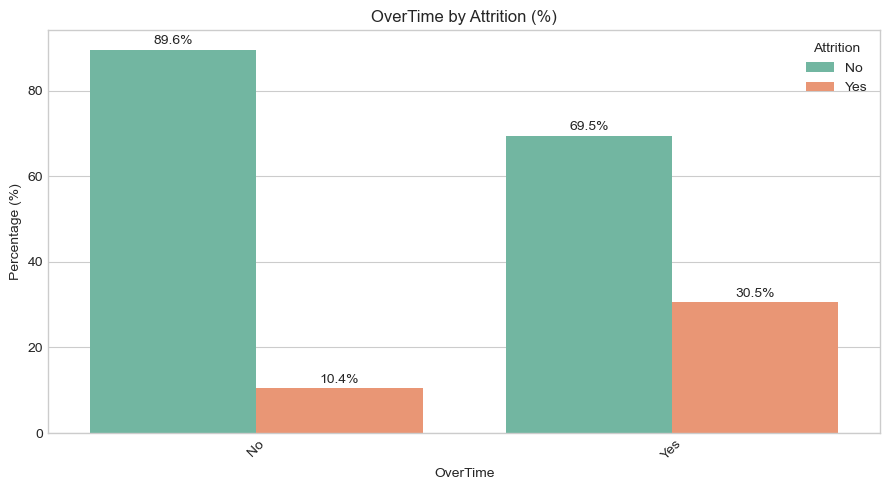

In [170]:
categorical_cols = ['Department', 'JobRole', 'Gender', 'EducationField', 'MaritalStatus', 'BusinessTravel', 'OverTime']

for col in categorical_cols:
    # Calculate % attrition within each category
    percent_df = (
        df.groupby(col)['Attrition']
        .value_counts(normalize=True)
        .rename('percentage')
        .mul(100)
        .reset_index()
    )

    plt.figure(figsize=(9, 5))
    ax = sns.barplot(
        data=percent_df,
        x=col,
        y='percentage',
        hue='Attrition',
        order=df[col].value_counts().index,
        palette='Set2'
    )

    # Add percentage labels on each bar
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2)

    plt.title(f"{col} by Attrition (%)")
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



### Attrition by Department, Job Role, and Gender

We calculate attrition rates across key categories to discover which groups are most at risk of leaving.

In [168]:
# Attrition rate by department
dept_attrition = df.groupby('Department')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
display(dept_attrition)

# Attrition rate by job role
role_attrition = df.groupby('JobRole')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
display(role_attrition)

# Attrition rate by gender
gender_attrition = df.groupby('Gender')['Attrition'].value_counts(normalize=True).unstack().fillna(0) * 100
display(gender_attrition)

Attrition,No,Yes
Department,,
Human Resources,80.952381,19.047619
Research & Development,86.160250,13.839750
Sales,79.372197,20.627803


Attrition,No,Yes
JobRole,,
Healthcare Representative,93.129771,6.870229
Human Resources,76.923077,23.076923
Laboratory Technician,76.061776,23.938224
Manager,95.098039,4.901961
Manufacturing Director,93.103448,6.896552
Research Director,97.500000,2.500000
Research Scientist,83.904110,16.095890
Sales Executive,82.515337,17.484663
Sales Representative,60.240964,39.759036


Attrition,No,Yes
Gender,,
Female,85.204082,14.795918
Male,82.993197,17.006803


### Average Monthly Income by Job Role and Gender

We compare salary levels across job roles and between genders to investigate income distribution.

Average Monthly Income by Job Role:


,Job Role,Average Monthly Income
0,Manager,17181.68
1,Research Director,16033.55
2,Healthcare Representative,7528.76
3,Manufacturing Director,7295.14
4,Sales Executive,6924.28
5,Human Resources,4235.75
6,Research Scientist,3239.97
7,Laboratory Technician,3237.17
8,Sales Representative,2626.00


Average Monthly Income by Gender:


,Gender,Average Monthly Income
0,Female,6686.57
1,Male,6380.51


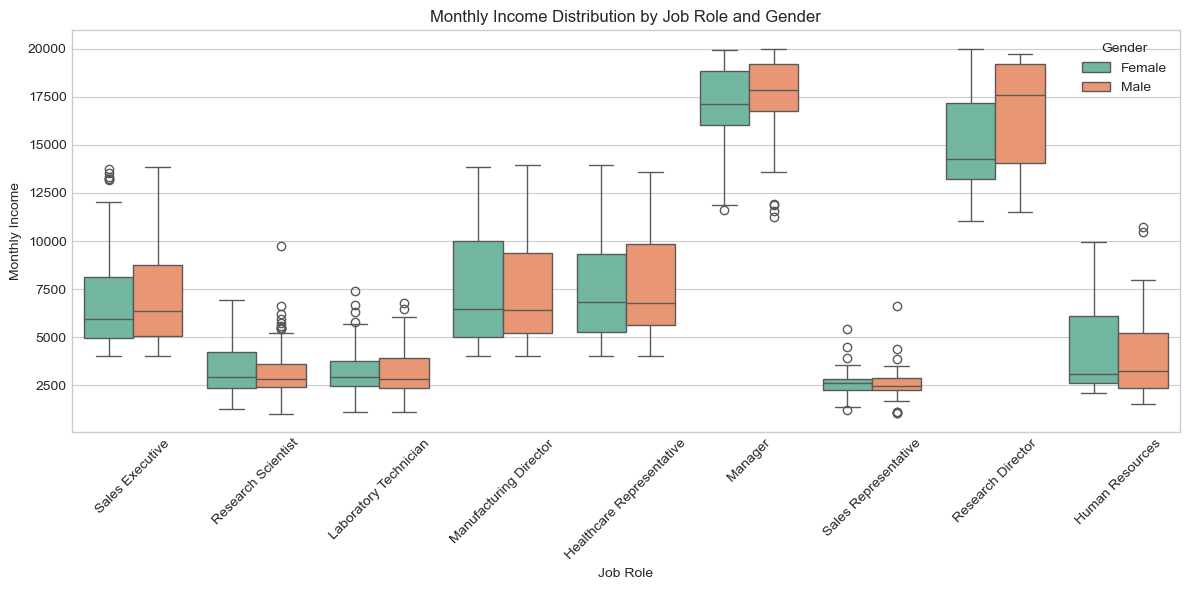

In [172]:
# Average Monthly Income by Job Role
job_income = df.groupby('JobRole')['MonthlyIncome'].mean().sort_values(ascending=False).round(2)
job_income_df = job_income.to_frame().reset_index()
job_income_df.columns = ['Job Role', 'Average Monthly Income']

# Display neatly
print("Average Monthly Income by Job Role:")
display(job_income_df)

# Average Monthly Income by Gender
gender_income = df.groupby('Gender')['MonthlyIncome'].mean().round(2)
gender_income_df = gender_income.to_frame().reset_index()
gender_income_df.columns = ['Gender', 'Average Monthly Income']

print("Average Monthly Income by Gender:")
display(gender_income_df)

# Boxplot: Monthly Income by Job Role and Gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobRole', y='MonthlyIncome', hue='Gender', data=df, palette='Set2')
plt.title("Monthly Income Distribution by Job Role and Gender")
plt.xticks(rotation=45)
plt.ylabel("Monthly Income")
plt.xlabel("Job Role")
plt.tight_layout()
plt.show()

These charts and tables show how employee income varies by job role and gender.

- The bar chart helps compare average salary by role.
- The table shows that certain roles (e.g., Manager, Research Director) have much higher average income.
- The boxplot reveals the spread of income by gender within each job role, which may help identify potential inequality or role-based trends.

Average Monthly Income by Job Role:


,Job Role,Average Monthly Income
0,Manager,17181.68
1,Research Director,16033.55
2,Healthcare Representative,7528.76
3,Manufacturing Director,7295.14
4,Sales Executive,6924.28
5,Human Resources,4235.75
6,Research Scientist,3239.97
7,Laboratory Technician,3237.17
8,Sales Representative,2626.00


Average Monthly Income by Gender:


,Gender,Average Monthly Income
0,Female,6686.57
1,Male,6380.51


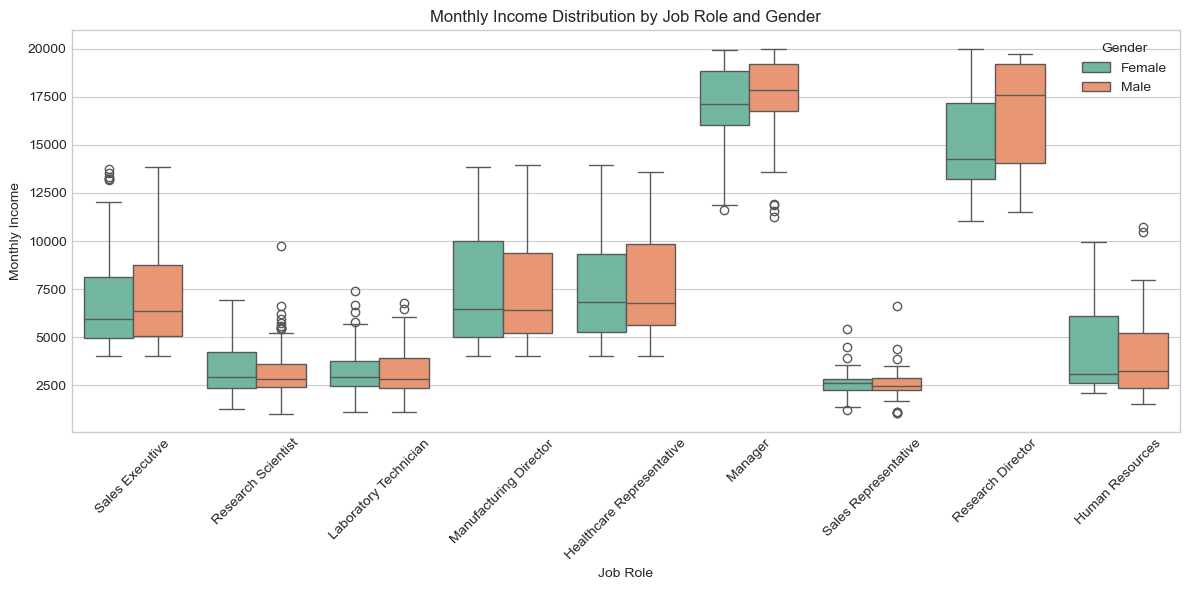

In [60]:
# Table: Average Monthly Income by Job Role
job_income = df.groupby('JobRole')['MonthlyIncome'].mean().sort_values(ascending=False).round(2)
job_income_df = job_income.to_frame().reset_index()
job_income_df.columns = ['Job Role', 'Average Monthly Income']

print("Average Monthly Income by Job Role:")
display(job_income_df)

# Table: Average Monthly Income by Gender
gender_income = df.groupby('Gender')['MonthlyIncome'].mean().round(2)
gender_income_df = gender_income.to_frame().reset_index()
gender_income_df.columns = ['Gender', 'Average Monthly Income']

print("Average Monthly Income by Gender:")
display(gender_income_df)

# Boxplot: Monthly Income Distribution by Job Role and Gender
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='JobRole', y='MonthlyIncome', hue='Gender', palette='Set2')
plt.title("Monthly Income Distribution by Job Role and Gender")
plt.xlabel("Job Role")
plt.ylabel("Monthly Income")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Attrition vs Lifestyle and Personal Factors

These charts explore how personal and lifestyle-related factors may be linked to employee attrition.

- **Distance from Home**: Employees who left the company tend to live slightly farther away, on average, compared to those who stayed. While the difference isn’t extreme, it may still be a contributing factor — especially when combined with other pressures like long hours or travel.

- **Marital Status**: Single employees show a significantly higher attrition rate than married or divorced employees. This may reflect differences in job stability, external responsibilities, or flexibility needs.

- **Work-Life Balance**: Employees who rated their work-life balance as poor (1 or 2) are more likely to have left the company. Attrition is lower among those who rated their balance as 3 or 4, which suggests that work-life satisfaction plays a role in employee retention.

These insights support the inclusion of these features in classification models, as they may help explain why certain employees are more likely to leave.

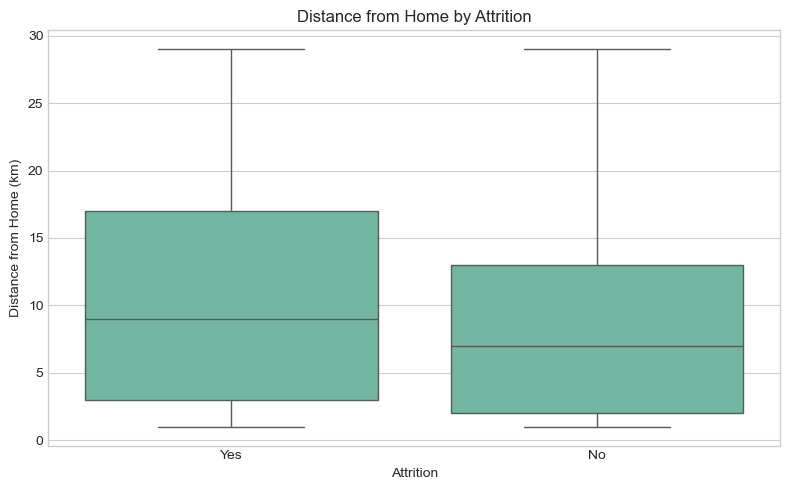

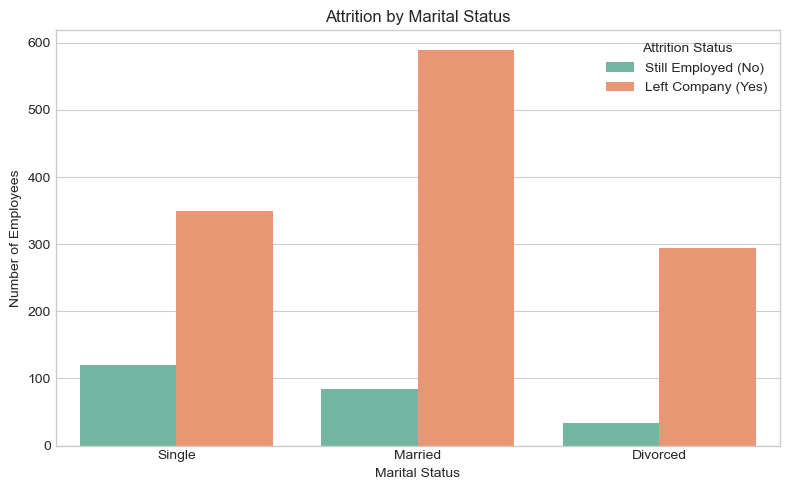

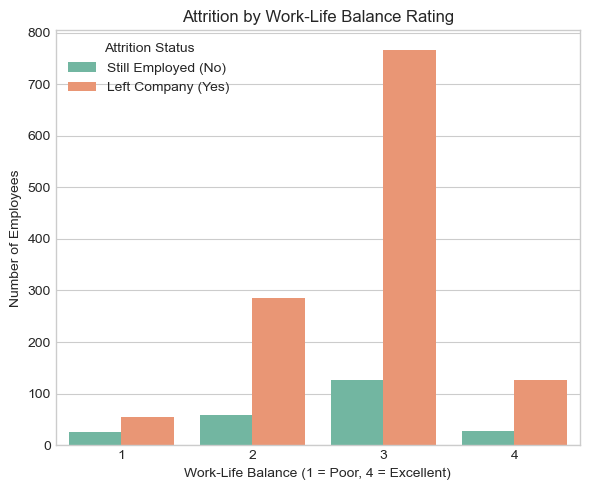

In [57]:
# Boxplot: Distance from Home by Attrition
plt.figure(figsize=(8, 5))
sns.boxplot(x='Attrition', y='DistanceFromHome', data=df)
plt.title("Distance from Home by Attrition")
plt.xlabel("Attrition")
plt.ylabel("Distance from Home (km)")
plt.tight_layout()
plt.show()

# Countplot: Marital Status by Attrition
plt.figure(figsize=(8, 5))
sns.countplot(x='MaritalStatus', hue='Attrition', data=df, palette='Set2')
plt.title("Attrition by Marital Status")
plt.xlabel("Marital Status")
plt.ylabel("Number of Employees")
plt.legend(title='Attrition Status', labels=['Still Employed (No)', 'Left Company (Yes)'])
plt.tight_layout()
plt.show()

# Countplot: Work-Life Balance by Attrition
plt.figure(figsize=(6, 5))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='Set2')
plt.title("Attrition by Work-Life Balance Rating")
plt.xlabel("Work-Life Balance (1 = Poor, 4 = Excellent)")
plt.ylabel("Number of Employees")
plt.legend(title='Attrition Status', labels=['Still Employed (No)', 'Left Company (Yes)'])
plt.tight_layout()
plt.show()

In [194]:
# Median Distance from Home by Attrition
print("Median Distance from Home by Attrition:")
display(df.groupby('Attrition')['DistanceFromHome'].median().round(1).to_frame())

# Work-Life Balance Group Sizes
print("Employee count by Work-Life Balance rating:")
display(df['WorkLifeBalance'].value_counts().sort_index().to_frame(name='Employee Count'))

# Attrition rate by Work-Life Balance
wlb_attrition_rate = (
    df.groupby('WorkLifeBalance')['Attrition']
    .value_counts(normalize=True)
    .unstack()
    .mul(100)
    .round(1)
)

display(wlb_attrition_rate)

Median Distance from Home by Attrition:


,DistanceFromHome
Attrition,
No,7.0
Yes,9.0


Employee count by Work-Life Balance rating:


,Employee Count
WorkLifeBalance,
1,80
2,344
3,893
4,153


Attrition,No,Yes
WorkLifeBalance,,
1,68.8,31.2
2,83.1,16.9
3,85.8,14.2
4,82.4,17.6


#### Percentage of Employees Who Left or Stayed by Work-Life Balance

This plot shows the percentage of employees who left (`Attrition = Yes`) or stayed (`Attrition = No`) for each work-life balance rating:

- Employees who rated their balance as **1 (poor)** had the **highest attrition rate**.
- Those with ratings **3 and 4** had **lower attrition**, suggesting better balance may contribute to retention.

This supports including `WorkLifeBalance` as a meaningful feature in predicting attrition.

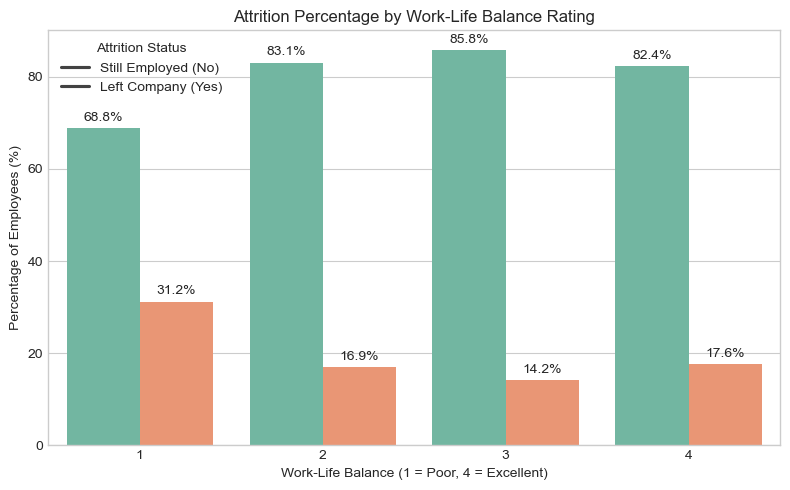

In [196]:
# Reset for plotting
wlb_attrition_pct = wlb_attrition_rate.reset_index().melt(id_vars='WorkLifeBalance', 
                                                          var_name='Attrition', 
                                                          value_name='Percentage')

# Plot percentage-based bar chart
plt.figure(figsize=(8, 5))
sns.barplot(data=wlb_attrition_pct, x='WorkLifeBalance', y='Percentage', hue='Attrition', palette='Set2')
plt.title("Attrition Percentage by Work-Life Balance Rating")
plt.xlabel("Work-Life Balance (1 = Poor, 4 = Excellent)")
plt.ylabel("Percentage of Employees (%)")
plt.legend(title="Attriti1on Status", labels=["Still Employed (No)", "Left Company (Yes)"])

# Add percentage labels
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%.1f%%', padding=3)

plt.tight_layout()
plt.show()

#### Education and Job Satisfaction

We analyze whether education or job satisfaction impacts happiness and turnover.

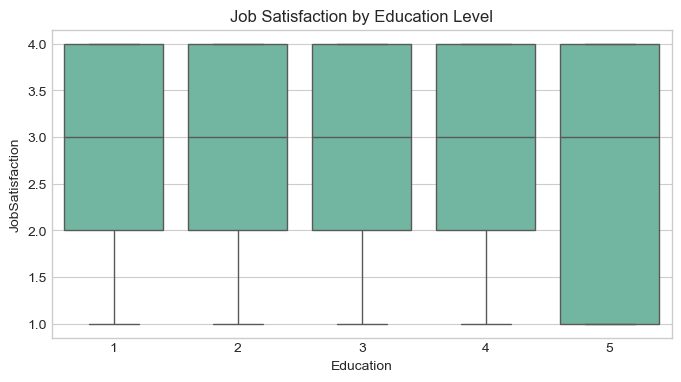

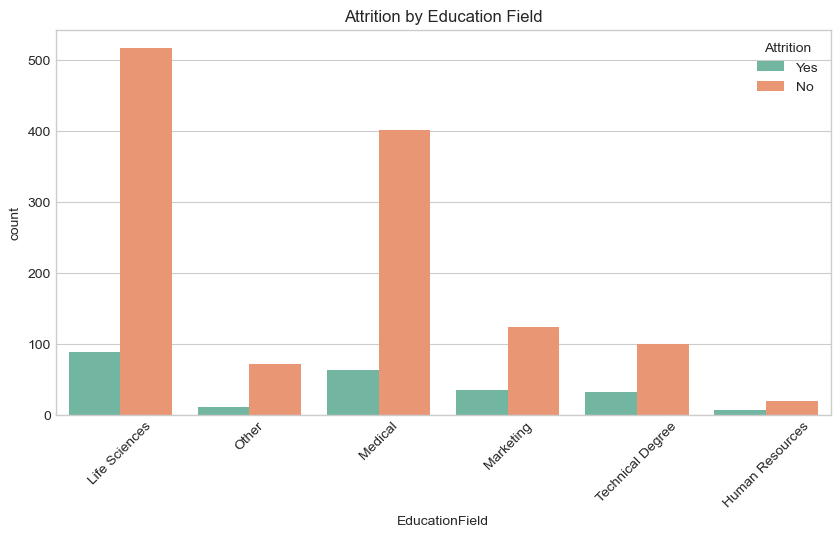

In [106]:
# Education level vs JobSatisfaction
plt.figure(figsize=(8, 4))
sns.boxplot(x='Education', y='JobSatisfaction', data=df)
plt.title("Job Satisfaction by Education Level")
plt.show()

# Attrition by Education Field
plt.figure(figsize=(10, 5))
sns.countplot(x='EducationField', hue='Attrition', data=df)
plt.title("Attrition by Education Field")
plt.xticks(rotation=45)
plt.show()

### Summary: Data Wrangling and Exploration

We began our analysis by exploring the IBM HR Employee Attrition dataset, which consists of 1470 employee records and 35 features. The dataset includes both numerical and categorical variables related to demographics, job roles, performance, compensation, and satisfaction. Importantly, there were no missing values, so we were able to proceed directly with analysis without needing imputation or data cleaning.

Our target variable, Attrition, is imbalanced — only about 17% of employees in the dataset had left the company. This imbalance was clearly reflected in our count and percentage plots, and it’s something we’ll need to consider when building classification models, to avoid bias toward the majority class.

From our univariate and bivariate visualizations, we observed that some roles and categories show clear differences in attrition rates. For instance, Sales Representatives had the highest attrition at nearly 40%, while Managers and Research Directors had the lowest. Single employees were more likely to leave than married or divorced ones, and those who worked overtime had significantly higher attrition. We also noticed that employees who reported lower work-life balance were more likely to leave, with the highest attrition observed at balance ratings of 1 and 2. These patterns suggest that both job characteristics and personal/lifestyle factors play a role in attrition.

We also explored salary and experience-related patterns. Our boxplots and bar charts showed that Managers, Research Directors, and Healthcare Representatives earn the most on average. While income differences by gender were small overall, some differences appeared within specific roles. Features like JobLevel, TotalWorkingYears, and MonthlyIncome were strongly correlated, indicating that more experienced and higher-ranking employees earn more. The heatmap confirmed these relationships, showing a strong cluster among these features. On the other hand, features like JobSatisfaction, EnvironmentSatisfaction, and WorkLifeBalance were weakly correlated with most other variables, which could suggest they may offer unique predictive value in classification models rather than regression.

Finally, we reviewed our features and identified a subset to carry forward into modeling. Based on the strength of their relationships to either attrition or salary, we selected several categorical features including JobRole, OverTime, BusinessTravel, and MaritalStatus, as well as numerical features such as MonthlyIncome, TotalWorkingYears, JobLevel, YearsAtCompany, DistanceFromHome, Age, JobSatisfaction, and WorkLifeBalance.

Overall, our exploration showed that the dataset is clean and provides a strong foundation for predictive modeling. We observed meaningful patterns that link employee behavior with satisfaction, seniority, compensation, and lifestyle. These insights will directly inform how we build and evaluate our regression, classification, and clustering models in the upcoming tasks.

### 1.6 Encode Categorical Variables

We begin by encoding binary and multi-class categorical features to prepare the dataset for machine learning models.

In [121]:
# Create a working copy
df_encoded = df.copy()

# Binary categorical columns
binary_cols = ['Attrition', 'OverTime', 'Gender', 'Over18']

# Apply label encoding
le = LabelEncoder()
for col in binary_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

#### One-Hot Encoding for Multi-Class Categories

For categorical features with more than two categories, we use one-hot encoding.

In [124]:
# Multi-class categorical columns
multi_class_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df_encoded, columns=multi_class_cols, drop_first=True)

# Save df_encoded (post-encoding, pre-scaling)
df_encoded.to_csv('../data/df_encoded.csv', index=False)
print("df_encoded saved successfully.")

df_encoded saved successfully.


#### Outlier Review

We inspect numeric features for extreme values using z-scores.

In [89]:
# Detect outliers using z-score
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
z_scores = df_encoded[numeric_cols].apply(zscore)
outliers = (abs(z_scores) > 3).sum().sort_values(ascending=False)

# Display columns with outliers
outliers[outliers > 0]

YearsSinceLastPromotion    42
YearsAtCompany             25
TotalWorkingYears          16
YearsWithCurrManager       14
YearsInCurrentRole         13
dtype: int64

#### Feature Scaling

We scale the numerical features to standardize their values, which is important for regression and clustering.

In [128]:
# Copy to df_clean
df_clean = df_encoded.copy()

# Select features to scale (exclude target)
features_to_scale = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
features_to_scale.remove('MonthlyIncome')  # Target variable for regression

# Apply StandardScaler
scaler = StandardScaler()
df_clean[features_to_scale] = scaler.fit_transform(df_clean[features_to_scale])

# Confirm scaling
df_clean.head()

# Save the final cleaned dataset
df_clean.to_csv('../data/df_clean.csv', index=False)
print("df_clean saved successfully.")

df_clean saved successfully.


### Final Preprocessing and Data Preparation Summary

#### Encoding

To prepare the dataset for machine learning, we first encoded all categorical variables. Binary categorical columns such as `Attrition`, `Gender`, `OverTime`, and `Over18` were encoded using label encoding, where categories were mapped to 0 and 1. Multi-class categorical features — including `JobRole`, `BusinessTravel`, `MaritalStatus`, `Department`, and `EducationField` — were encoded using one-hot encoding, with `drop_first=True` to avoid multicollinearity.

#### Outlier Detection

We performed outlier detection using z-scores, flagging values above 3 or below -3. Some features showed notable outliers, particularly:
- `YearsSinceLastPromotion` (42 extreme values)
- `YearsAtCompany`, `TotalWorkingYears`, `YearsInCurrentRole`, and `YearsWithCurrManager`

After reviewing the data, we determined that these values were valid and likely reflect natural variation in employee experience, seniority, or rare career paths. We chose to retain these outliers and will monitor their impact on model performance.

#### Feature Scaling

We used `StandardScaler` to normalize all numerical features, setting their mean to 0 and standard deviation to 1. This step is important for ensuring that all features contribute equally to models such as linear regression and clustering, which are sensitive to scale.

The target variable for regression, `MonthlyIncome`, was excluded from scaling to keep its units interpretable. All other continuous features were scaled.

#### Final Dataset (`df_clean`)

The fully preprocessed dataset now includes:
- One-hot encoded categorical variables
- Scaled numerical features
- No missing values or duplicate rows

The shape of the final dataset is `(1470, n)`, where `n` includes all original numeric features and additional one-hot encoded columns. This dataset (`df_clean`) is now ready for:

- **Regression** (e.g., predicting `MonthlyIncome`)
- **Classification** (e.g., predicting `Attrition`)
- **Clustering** (e.g., grouping similar employee profiles)

#### Feature Summary and Modeling Readiness

Based on our exploratory analysis and preprocessing, we identified several key features likely to influence employee attrition and salary prediction. These include:

- `TotalWorkingYears`
- `JobLevel`
- `MonthlyIncome`
- `Age`
- `YearsAtCompany`
- `OverTime`
- `BusinessTravel`
- `JobRole`
- `WorkLifeBalance`
- `MaritalStatus`

These features will form the basis of our modeling efforts in the next tasks. The dataset is clean, well-prepared, and ready for supervised and unsupervised machine learning.


--------------------

## Task 2: Supervised Machine Learning – Linear Regression

In this task, we aim to predict employees' monthly income based on their profile data using linear regression. We will use the preprocessed dataset `df_clean`, which includes encoded categorical variables and scaled numerical features.

The target variable for this regression is `MonthlyIncome`, and all other features will be used as predictors.

In [130]:
from sklearn.model_selection import train_test_split

# Define target and features
X = df_clean.drop(columns=['MonthlyIncome'])
y = df_clean['MonthlyIncome']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (1176, 48)
Test set shape: (294, 48)


We define `MonthlyIncome` as our target variable (`y`) and use all other columns in `df_clean` as input features (`X`). We split the data into training and testing sets using an 80/20 split to evaluate model performance on unseen data.

In [132]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Predict on test set
y_pred = reg_model.predict(X_test)

We train a linear regression model using the training data. After fitting the model, we generate predictions on the test set to evaluate how well the model performs on new, unseen data.

In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("Root Mean Squared Error (RMSE):", round(rmse, 2))
print("R² Score:", round(r2, 4))

Mean Absolute Error (MAE): 891.76
Root Mean Squared Error (RMSE): 1165.71
R² Score: 0.9378


We evaluate the regression model using standard metrics:

- **MAE (Mean Absolute Error):** Average error between predicted and actual income
- **RMSE (Root Mean Squared Error):** Gives more weight to large errors
- **R² Score:** Explains how much variance in income is explained by the model (1.0 = perfect)

These metrics help us assess how accurate and reliable our income predictions are.


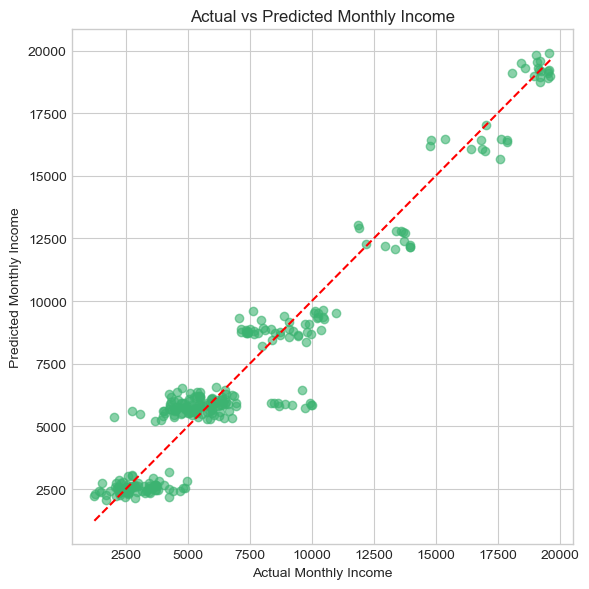

In [152]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='mediumseagreen')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Monthly Income")
plt.ylabel("Predicted Monthly Income")
plt.title("Actual vs Predicted Monthly Income")
plt.tight_layout()
plt.show()

The scatter plot compares actual income to predicted income. The red dashed line represents perfect predictions. The closer the points are to this line, the better the model has performed.

### Saving the Model and Scaler for Deployment

To use this regression model in a future Streamlit app, we save both the trained model and the scaler object. These files can be loaded later to make predictions using the same preprocessing and trained weights.


In [154]:
# Save the linear regression model
joblib.dump(reg_model, '../models/linear_regression_model.pkl')

# Save the scaler used for standardizing the features
joblib.dump(scaler, '../models/feature_scaler.pkl')

# Optional: Save the clean dataset (without target)
df_clean.drop(columns=['MonthlyIncome']).to_csv('../data/clean_features.csv', index=False)

# Save the linear regression model
joblib.dump(reg_model, '../models/linear_regression_model.pkl')

# Save the scaler used for standardizing the features
joblib.dump(scaler, '../models/feature_scaler.pkl')

# Optional: Save the clean dataset (without target)
df_clean.drop(columns=['MonthlyIncome']).to_csv('../data/clean_features.csv', index=False)


We saved the trained linear regression model and the scaler as `.pkl` files, which can be loaded directly into a Streamlit app for making predictions.

We also saved the cleaned feature dataset as a `.csv` file, which can be used for reference or future data processing in the app.


#### View Feature Coefficients

In [146]:
# Create a DataFrame to view feature coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': reg_model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Display top and bottom contributing features
print("Top 10 Features Increasing Salary:")
display(coefficients.head(10))

print("Top 10 Features Decreasing Salary:")
display(coefficients.tail(10))


Top 10 Features Increasing Salary:


,Feature,Coefficient
40,JobRole_Manager,4382.046775
42,JobRole_Research Director,3994.342365
11,JobLevel,3104.366349
31,Department_Research & Development,427.731038
44,JobRole_Sales Executive,378.584827
22,TotalWorkingYears,333.226693
38,JobRole_Human Resources,167.902081
30,BusinessTravel_Travel_Rarely,165.816345
29,BusinessTravel_Travel_Frequently,161.446818
32,Department_Sales,89.115160


Top 10 Features Decreasing Salary:


,Feature,Coefficient
18,PerformanceRating,-67.076410
34,EducationField_Marketing,-78.370446
35,EducationField_Medical,-86.311442
37,EducationField_Technical Degree,-88.244302
28,YearsWithCurrManager,-107.662797
33,EducationField_Life Sciences,-132.369937
45,JobRole_Sales Representative,-251.778437
36,EducationField_Other,-261.900309
43,JobRole_Research Scientist,-374.933363
39,JobRole_Laboratory Technician,-472.513920


### Model Validation on Unseen Test Data

To assess how well the regression model generalizes to new, unseen data, we evaluate it on the test dataset. The R² score tells us how much of the variance in monthly income is explained by the model predictions.

In [187]:
X = df_clean.drop(columns=['MonthlyIncome'])  # drop only target
y = df_clean['MonthlyIncome']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
from sklearn.metrics import r2_score

y_pred_test = reg_model.predict(X_test)
print("R²-score on test data:", round(r2_score(y_test, y_pred_test), 4))

R²-score on test data: 0.9378


On the test set, our model achieved an R² score of **0.9378**, indicating strong predictive performance. This suggests that the model is able to explain approximately 94% of the variation in employee income on data it has not seen before.

This final validation step confirms that the model is not just overfitting to the training data but can also make accurate predictions on new input.

### Predicting Monthly Income for a New Employee
To demonstrate that our model works on new data, we simulate a case where a new employee's profile is used as input. The model will predict the expected monthly income based on their attributes.

In [213]:
# Use the mean of training data as a realistic new employee profile
new_employee_input = pd.DataFrame([X_train.mean()], columns=X_train.columns)

# Predict using trained model
predicted_income = reg_model.predict(new_employee_input)

print("Predicted monthly income for a new employee:", round(predicted_income[0], 2))

Predicted monthly income for a new employee: 6382.52


In [221]:
features_to_scale = df_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
features_to_scale.remove('MonthlyIncome')

def predict_income_for_employee(raw_features: dict, reg_model, scaler, features_to_scale, reference_columns):
    import pandas as pd
    import numpy as np

    # Create initial DataFrame
    df = pd.DataFrame([raw_features])

    # Add any missing columns (fill with 0)
    for col in reference_columns:
        if col not in df.columns:
            df[col] = 0

    # Ensure correct column order
    df = df[reference_columns]

    # Scale only the original numeric columns
    df_scaled = df.copy()
    df_scaled[features_to_scale] = scaler.transform(df_scaled[features_to_scale])

    # Predict
    prediction = reg_model.predict(df_scaled)
    return round(prediction[0], 2)


In [223]:
# Define raw employee profile (with all categorical + numeric inputs)
employee_input = {
    'Age': 35,
    'TotalWorkingYears': 10,
    'JobLevel': 2,
    'YearsAtCompany': 4,
    'Education': 3,
    'DistanceFromHome': 8,
    'NumCompaniesWorked': 2,
    'PercentSalaryHike': 12,
    'YearsInCurrentRole': 2,
    'YearsSinceLastPromotion': 1,
    'YearsWithCurrManager': 3,
    'OverTime': 1,
    'Gender': 1,
    'Over18': 1,
    'PerformanceRating': 3,
    'JobInvolvement': 3,
    'JobSatisfaction': 3,
    'EnvironmentSatisfaction': 3,
    'WorkLifeBalance': 3,
    'RelationshipSatisfaction': 3,
    'TrainingTimesLastYear': 3,
    'StockOptionLevel': 1,
    'DailyRate': 1000,
    'HourlyRate': 70,
    'MonthlyRate': 20000,
    'EmployeeCount': 1,
    'EmployeeNumber': 9999,
    'Attrition': 0,
    'StandardHours': 40,
    'BusinessTravel_Travel_Frequently': 0,
    'BusinessTravel_Travel_Rarely': 1,
    'Department_Research & Development': 0,
    'Department_Sales': 1,
    'EducationField_Life Sciences': 1,
    'EducationField_Marketing': 0,
    'EducationField_Medical': 0,
    'EducationField_Other': 0,
    'EducationField_Technical Degree': 0,
    'JobRole_Human Resources': 0,
    'JobRole_Laboratory Technician': 0,
    'JobRole_Manager': 0,
    'JobRole_Manufacturing Director': 0,
    'JobRole_Research Director': 0,
    'JobRole_Research Scientist': 0,
    'JobRole_Sales Executive': 1,
    'JobRole_Sales Representative': 0,
    'MaritalStatus_Married': 0,
    'MaritalStatus_Single': 1
}

# Call the function
predicted_income = predict_income_for_employee(
    raw_features=employee_input,
    reg_model=reg_model,
    scaler=scaler,
    features_to_scale=features_to_scale,
    reference_columns=X_train.columns.tolist()
)

print("Predicted Monthly Income:", predicted_income)

Predicted Monthly Income: 6342.55


We created a new, custom employee profile using raw input values and encoded it to match our training data structure. After applying the same scaling, we used our regression model to predict the monthly income for this employee.

This step simulates a real-world scenario where HR can estimate salary ranges for potential or new hires based on their profile.

### Visual Comparison

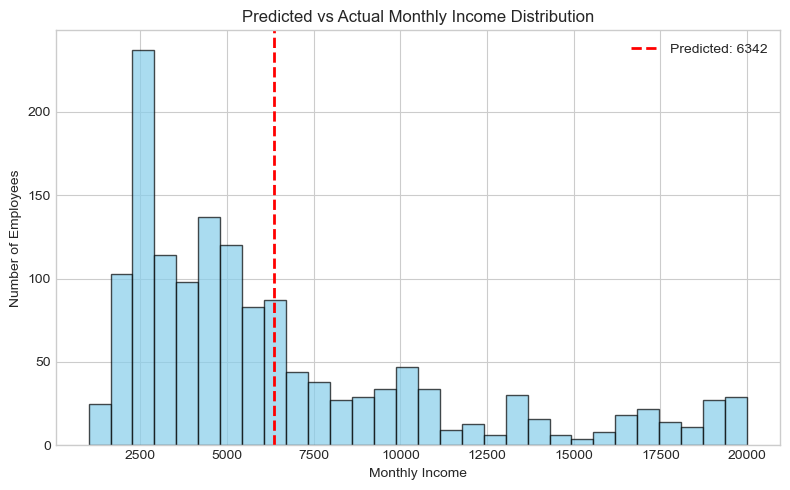

In [225]:
# Example: 
income_distribution = df['MonthlyIncome']

# Plot histogram of real salaries
plt.figure(figsize=(8, 5))
plt.hist(income_distribution, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(predicted_income, color='red', linestyle='--', linewidth=2, label=f"Predicted: {int(predicted_income)}")

plt.title("Predicted vs Actual Monthly Income Distribution")
plt.xlabel("Monthly Income")
plt.ylabel("Number of Employees")
plt.legend()
plt.tight_layout()
plt.show()

#### Predicted Income in Context
The chart shows the predicted monthly income for a new employee (red dashed line) compared to the actual income distribution of all employees. This visual helps us see whether the predicted value is typical, low, or high relative to the rest of the organization.

### Summary: Linear Regression Model Interpretation

After training our linear regression model to predict monthly income, we examined the resulting coefficients to understand which features had the greatest influence on salary. Features with positive coefficients are associated with higher income, while those with negative coefficients suggest a decrease in predicted salary.

Unsurprisingly, the roles of Manager and Research Director had the strongest positive influence on salary predictions. This aligns with typical organizational structures, where senior leadership and specialized positions tend to be more highly compensated. JobLevel and TotalWorkingYears also showed strong positive relationships with salary, further supporting the idea that both seniority and experience are key drivers of compensation.

Other features, such as working in the Research & Development department or traveling frequently for business, also contributed positively to salary predictions, though with smaller effects. This suggests that department assignment and job-related travel may also influence compensation, albeit to a lesser degree.

On the other hand, some features had negative coefficients. For example, the roles of Laboratory Technician, Research Scientist, and Sales Representative were associated with lower predicted income. These positions are typically more junior or operational, which likely explains their lower pay in comparison to leadership roles. Interestingly, some education fields—such as Medical, Life Sciences, and Technical Degree—also had slight negative effects on income. This may reflect the types of roles employees from those fields typically enter rather than the education itself.

Two features, YearsWithCurrManager and PerformanceRating, showed small negative coefficients as well. These results were somewhat unexpected and may indicate multicollinearity with other tenure-related variables or the limitations of a linear model in capturing more complex relationships.

Overall, the model’s coefficients generally align with common sense and organizational logic. The linear model provides a transparent view into how different employee characteristics relate to salary, though future exploration with more flexible or non-linear models may reveal deeper patterns.

--------------------------

## 3. Supervised machine learning - classification

In this task, we aim to predict whether an employee will leave the company using classification models. We use the `Attrition` column as the target variable. This is a binary classification problem where:

- 1 = Employee left the company
- 0 = Employee stayed

We use the preprocessed dataset (`df_clean`) for modeling, and apply metrics like accuracy, precision, recall, and F1 score to evaluate model quality.

In [342]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [344]:
print(df_encoded['Attrition'].unique())


[1 0]


In [346]:
# Use encoded dataset (no scaling needed for logistic regression)
X = df_encoded.drop(columns=['Attrition'])
y = df_encoded['Attrition']

# Split (stratify to preserve class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

df_encoded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5,False,True,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0,False,True,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0,True,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2,False,True,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False


In [348]:
clf = LogisticRegression(max_iter=2000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [350]:
clf = LogisticRegression(solver='liblinear', max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

Accuracy: 0.8741496598639455
Precision: 0.8125
Recall: 0.2765957446808511
F1 Score: 0.4126984126984127


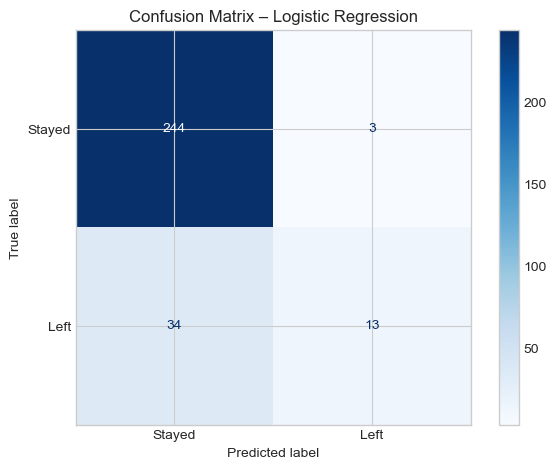

In [352]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Scores
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Stayed", "Left"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix – Logistic Regression")
plt.tight_layout()
plt.show()

We used the fully encoded dataset (`df_encoded`) to build a logistic regression classifier. After confirming that the `Attrition` variable was correctly encoded, we trained and evaluated the model. Performance was assessed using standard metrics, and the confusion matrix provided insight into how well the model distinguished between employees who stayed and those who left.

#### Try with df_clean dataset

In [358]:
# Restore df_clean from df_encoded
df_clean = df_encoded.copy()

# Just to be sure, cast Attrition to int (should already be 0/1)
df_clean['Attrition'] = df_clean['Attrition'].astype(int)

# Confirm it's fixed
print("Unique Attrition values:", df_clean['Attrition'].unique())
print("df_clean shape:", df_clean.shape)

Unique Attrition values: [1 0]
df_clean shape: (1470, 49)


In [360]:
# View current unique values before changing anything
print("Before fix:", df_clean['Attrition'].unique())

Before fix: [1 0]


In [362]:
from sklearn.model_selection import train_test_split

X = df_clean.drop(columns=['Attrition'])
y = df_clean['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [364]:
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (1176, 48)
Test size: (294, 48)


Accuracy: 0.8741496598639455

Classification Report:

              precision    recall  f1-score   support

      Stayed       0.89      0.97      0.93       247
        Left       0.71      0.36      0.48        47

    accuracy                           0.87       294
   macro avg       0.80      0.67      0.70       294
weighted avg       0.86      0.87      0.86       294



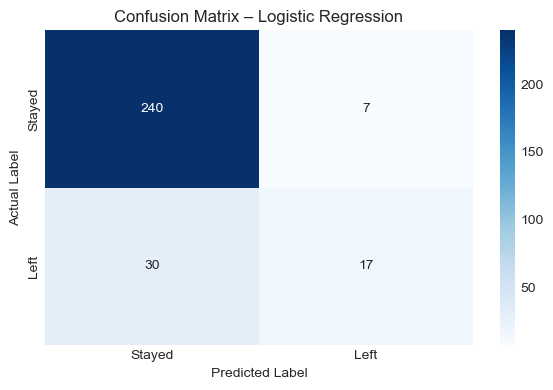

In [382]:
from sklearn.metrics import (
    accuracy_score, classification_report,
    confusion_matrix
)
import seaborn as sns
import matplotlib.pyplot as plt

# Train the model
clf = LogisticRegression(max_iter=1000, solver='liblinear')
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Stayed", "Left"]))

# Confusion Matrix (with labels)
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Stayed", "Left"],
            yticklabels=["Stayed", "Left"])
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix – Logistic Regression")
plt.tight_layout()
plt.show()

### Summary: Logistic Regression Evaluation 

We developed a logistic regression model to predict employee attrition based on the available features. The model achieved an overall accuracy of 87%, correctly classifying the majority of employees. It showed good precision (71%) when predicting who would leave, meaning that when the model flagged an employee as likely to leave, it was often correct.

However, the recall was relatively low at 36%, indicating that the model failed to detect a significant portion of employees who actually did leave. This is a common challenge in imbalanced datasets, where one class (in this case, employees who stayed) significantly outnumbers the other. As a result, the model tends to favor the majority class and becomes conservative in predicting attrition.

The confusion matrix visualization supports this conclusion. While the model accurately predicts most of the employees who stayed, it struggles to identify many of those who left. This limits the model’s ability to support proactive retention strategies.

To assess performance more thoroughly, we included a full classification report showing precision, recall, and F1-scores for both outcome classes. The labeled confusion matrix provides a clearer picture of the model’s strengths and weaknesses, particularly its tendency toward false negatives in predicting employee departures.

### Predict probabilities and group them
We'll use the model's .predict_proba() method to show how confident it is across different employee groups.

In [388]:
# Get predicted probabilities of class 1 (attrition = Yes)
y_proba = clf.predict_proba(X_test)[:, 1]
y_pred = clf.predict(X_test)

# Copy the X_test data into a new DataFrame for analysis
df_pred = X_test.copy()
df_pred['Actual Attrition'] = y_test.values
df_pred['Predicted Attrition'] = y_pred
df_pred['Attrition Probability'] = y_proba

#### Visualize mean attrition probability by category

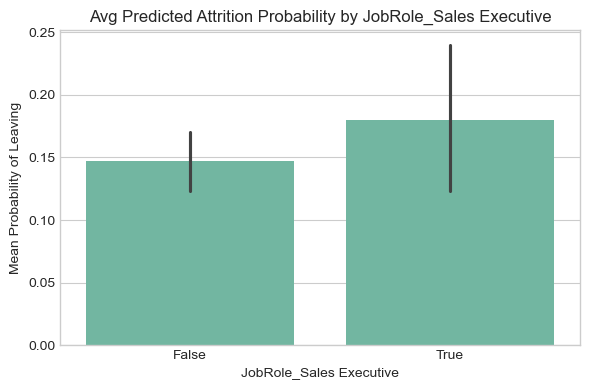

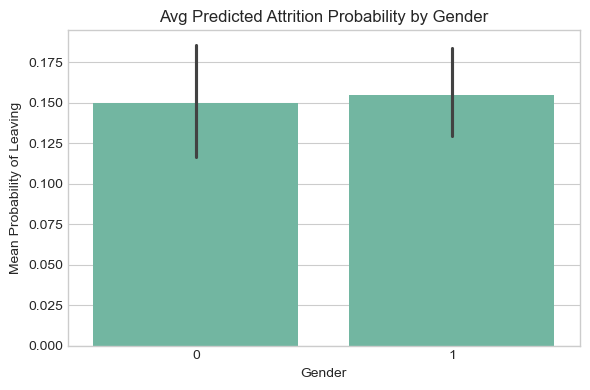

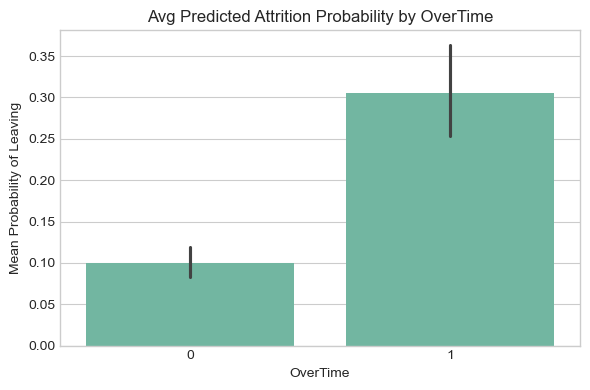

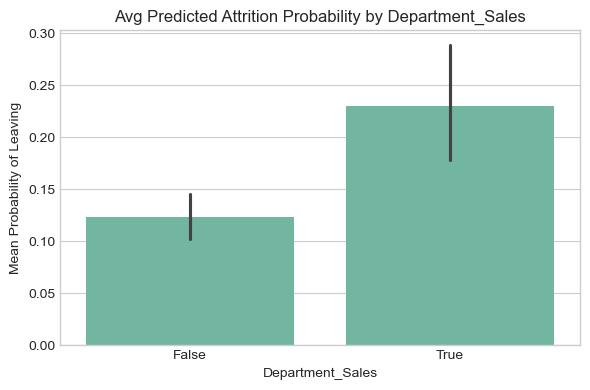

In [395]:
# Choose categorical features to analyze
categories = ['JobRole_Sales Executive', 'Gender', 'OverTime', 'Department_Sales']

for col in categories:
    if col in df_pred.columns:
        # Plot average predicted attrition probability by category
        plt.figure(figsize=(6, 4))
        sns.barplot(x=df_pred[col], y=df_pred['Attrition Probability'])
        plt.title(f"Avg Predicted Attrition Probability by {col}")
        plt.ylabel("Mean Probability of Leaving")
        plt.xlabel(col)
        plt.tight_layout()
        plt.show()

### Group by original features (JobRole, etc.)

To better understand how attrition predictions vary across groups, we visualized the model's predicted probabilities by category. This helps us see which roles or demographic groups the model considers most at risk. For example, we plotted the average predicted attrition probability for each job role, department, and gender group. These insights can support more targeted interventions.

In [471]:
df_test_raw = df_encoded.iloc[X_test.index].copy()
df_test_raw['Predicted'] = y_pred
df_test_raw['Probability'] = y_proba

# Example: average attrition probability by JobRole
plt.figure(figsize=(10, 4))
sns.barplot(data=df_test_raw, x='JobRole', y='Probability')
plt.title("Predicted Attrition Probability by Job Role")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `JobRole` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x400 with 0 Axes>

#### ROC Curve for Logistic Regression

The ROC (Receiver Operating Characteristic) curve visualizes the trade-off between true positives and false positives at different classification thresholds. It helps evaluate how well the model separates the two classes — in this case, employees who stayed versus those who left.

The curve plots the **True Positive Rate** (Recall) against the **False Positive Rate**. A model with no skill would follow the diagonal (gray dashed line), while a better model curves toward the top-left corner.

The **AUC (Area Under the Curve)** score summarizes this performance:  
- AUC = 0.5 means random guessing  
- AUC closer to 1.0 indicates excellent separation

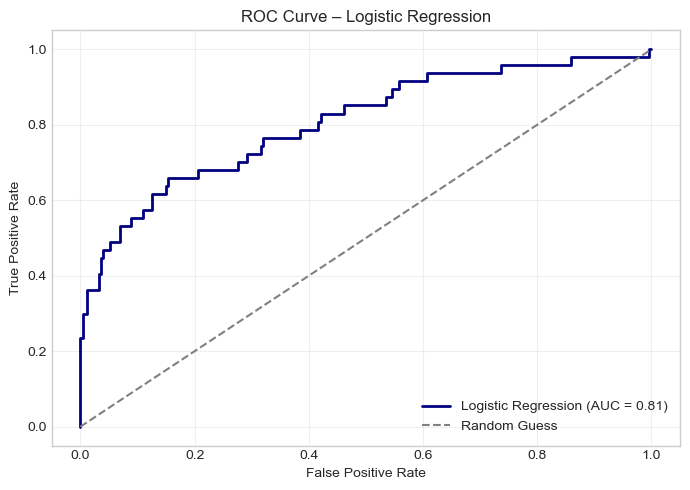

In [428]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class (Attrition = 1)
y_proba_lr = clf.predict_proba(X_test)[:, 1]

# Calculate False Positive Rate (FPR), True Positive Rate (TPR), and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba_lr)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})", color='navy', linewidth=2)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression")
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Our logistic regression model achieved an AUC of 0.81, which indicates strong overall classification performance. 
The curve bending clearly toward the upper left corner shows that the model is able to identify a significant portion of actual attrition cases while maintaining a manageable false positive rate. This supports the model’s usefulness as a decision-support tool, particularly when recall is important for proactive retention planning.

### Random Forest Classifier

Random Forest
Accuracy : 0.826530612244898
Recall   : 0.0425531914893617
F1 Score : 0.07272727272727272


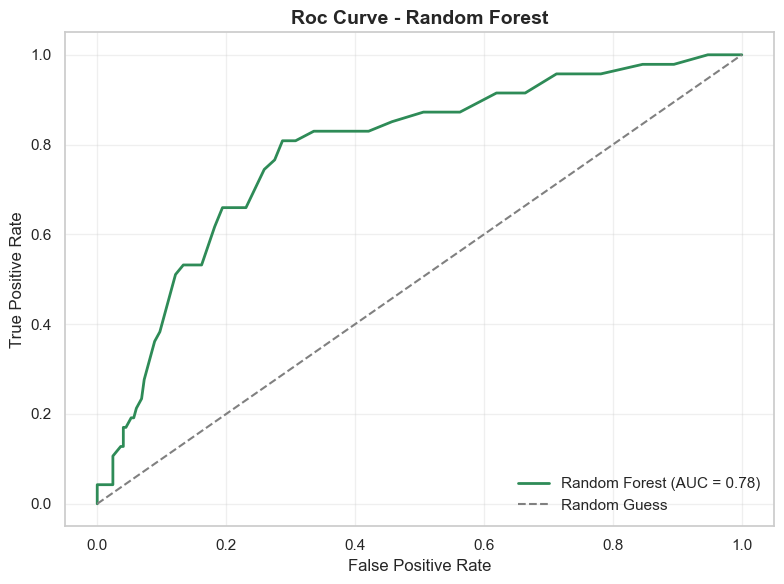

In [444]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Train Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_clf.predict(X_test)
y_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

# Metrics
print("Random Forest")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1 Score :", f1_score(y_test, y_pred_rf))

# ROC curve and AUC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plotting
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# ROC curves
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color='seagreen', linewidth=2)

# Diagonal reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1.5, label="Random Guess")

# Aesthetics
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("Roc Curve - Random Forest", fontsize=14, weight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


### Re-train Logistic Regression with Class Weight Adjustment

Logistic Regression (Balanced)
Accuracy : 0.7482993197278912
Recall   : 0.6595744680851063
F1 Score : 0.45588235294117646


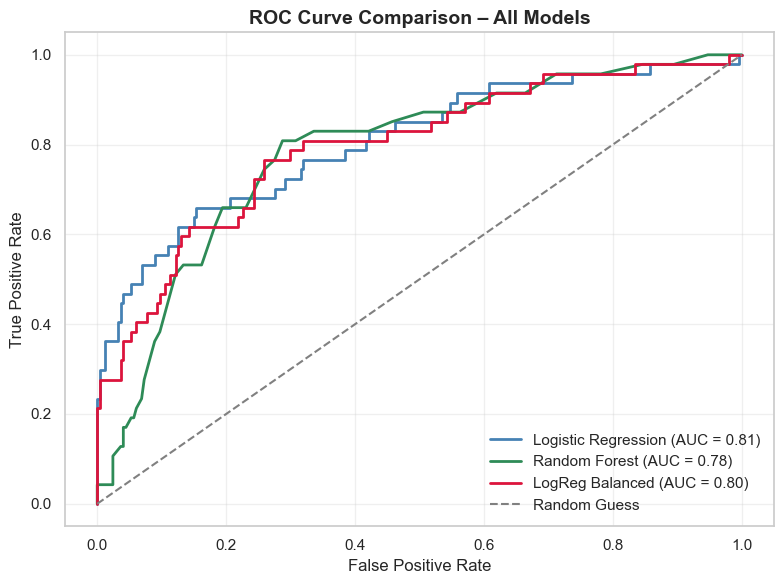

In [446]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_curve, auc, accuracy_score, recall_score, f1_score
)
import matplotlib.pyplot as plt
import seaborn as sns

# === Balanced Logistic Regression ===
clf_balanced = LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')
clf_balanced.fit(X_train, y_train)

y_pred_bal = clf_balanced.predict(X_test)
y_proba_bal = clf_balanced.predict_proba(X_test)[:, 1]

print("Logistic Regression (Balanced)")
print("Accuracy :", accuracy_score(y_test, y_pred_bal))
print("Recall   :", recall_score(y_test, y_pred_bal))
print("F1 Score :", f1_score(y_test, y_pred_bal))

# === ROC curves for all models ===
fpr_bal, tpr_bal, _ = roc_curve(y_test, y_proba_bal)
roc_auc_bal = auc(fpr_bal, tpr_bal)

# Plot settings
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Plot ROC curves
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})", color='steelblue', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color='seagreen', linewidth=2)
plt.plot(fpr_bal, tpr_bal, label=f"LogReg Balanced (AUC = {roc_auc_bal:.2f})", color='crimson', linewidth=2)

# Random guess line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', lw=1.5, label="Random Guess")

# Labels and legend
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve Comparison – All Models", fontsize=14, weight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


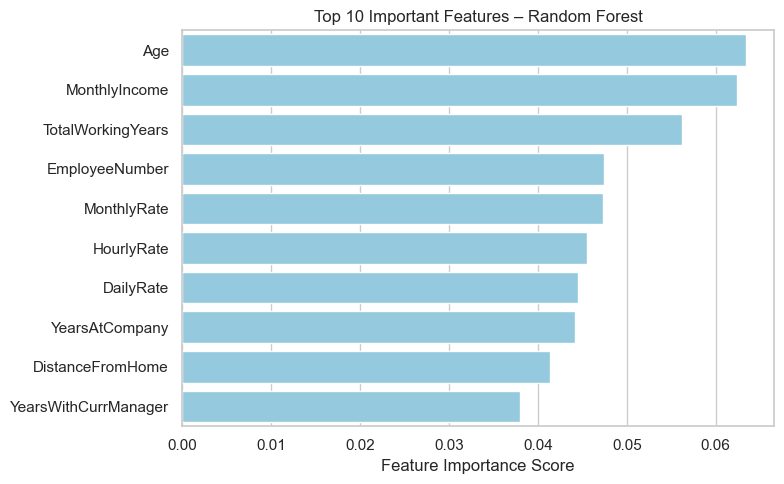

In [467]:
# Random Forest: feature importances
importances_rf = rf_clf.feature_importances_
rf_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances_rf
}).sort_values(by='Importance', ascending=False)

# Plot top 10
plt.figure(figsize=(8, 5))
sns.barplot(
    data=rf_importance_df.head(10),
    x='Importance',
    y='Feature',
    color='skyblue',  # one solid color
    errorbar=None
)
plt.title("Top 10 Important Features – Random Forest")
plt.xlabel("Feature Importance Score")
plt.ylabel("")
plt.tight_layout()
plt.show()


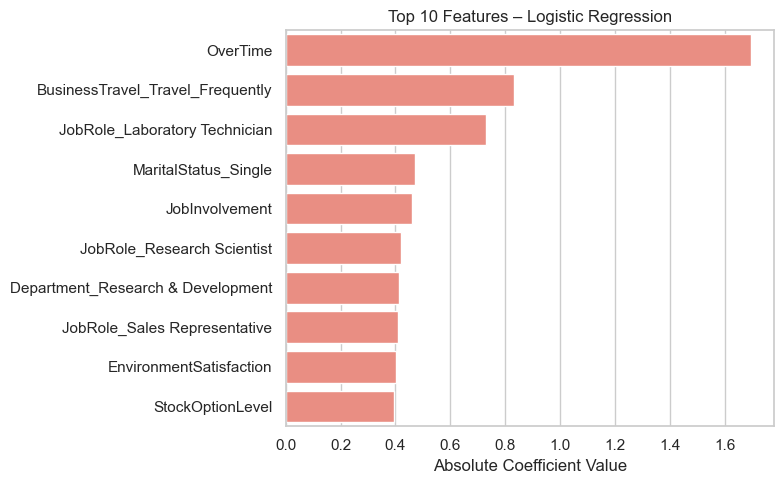

In [469]:
# Logistic Regression: absolute coefficient values
coef_lr = pd.Series(clf.coef_[0], index=X_train.columns)
coef_abs_df = pd.DataFrame({
    'Feature': coef_lr.index,
    'Coefficient Magnitude': coef_lr.abs()
}).sort_values(by='Coefficient Magnitude', ascending=False)

# Plot top 10
plt.figure(figsize=(8, 5))
sns.barplot(
    data=coef_abs_df.head(10),
    x='Coefficient Magnitude',
    y='Feature',
    color='salmon',  # one solid color
    errorbar=None
)
plt.title("Top 10 Features – Logistic Regression")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("")
plt.tight_layout()
plt.show()


#### Summary: Model Comparison

To evaluate and compare the ability of different models to detect employee attrition, we plotted ROC curves for three classifiers: standard logistic regression, balanced logistic regression (with class weighting), and a random forest.

- **Logistic Regression** performed well in terms of overall accuracy and AUC (0.81), but struggled with recall — failing to identify many employees who actually left.

- **Random Forest** offered strong accuracy and the ability to capture complex patterns. However, in this case, its recall was notably low, which limited its effectiveness in detecting true attrition cases despite a competitive AUC of 0.78.

- **Balanced Logistic** Regression improved recall substantially (up to ~66%) while maintaining a solid AUC (0.80). This demonstrates the benefit of adjusting for class imbalance when the minority class (employees who leave) is especially important to identify.

We compared feature importance from two different models:

- **Random Forest** determines importance based on how much each feature decreases impurity across all trees.
- **Logistic Regression** ranks features based on the absolute size of their coefficients, which represent their linear contribution to the prediction.

Despite different mechanisms, both models highlighted some overlapping features such as `OverTime`, `JobLevel`, and `TotalWorkingYears` as key predictors of attrition. These consistent signals suggest these factors play a central role in employee turnover and should be considered in further analysis or HR interventions.

--------

## 4. Unsupervised machine learning - clustering

In this task, we segment employees into similar groups using unsupervised learning. Clustering can help identify patterns in employee characteristics that may be linked to job roles, performance, or risk of attrition.
We will use the K-Means clustering algorithm and evaluate the quality of results using the silhouette score. The configuration with the highest silhouette score will be recommended as the best grouping.

#### Prepare the Data for Clustering

In [479]:
from sklearn.preprocessing import StandardScaler

# Use df_clean and drop non-feature columns (like Attrition)
X_cluster = df_clean.drop(columns=['Attrition'])

# Scale the features (important for distance-based methods like K-Means)
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

#### Run K-Means for Different Cluster Counts

In [483]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

sil_scores = []
k_range = range(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_cluster_scaled)
    score = silhouette_score(X_cluster_scaled, labels)
    sil_scores.append(score)
    print(f"k = {k}, Silhouette Score = {score:.4f}")

k = 2, Silhouette Score = 0.0841
k = 3, Silhouette Score = 0.0943
k = 4, Silhouette Score = 0.0718
k = 5, Silhouette Score = 0.0703
k = 6, Silhouette Score = 0.0815
k = 7, Silhouette Score = 0.1010
k = 8, Silhouette Score = 0.1094
k = 9, Silhouette Score = 0.0903
k = 10, Silhouette Score = 0.0798


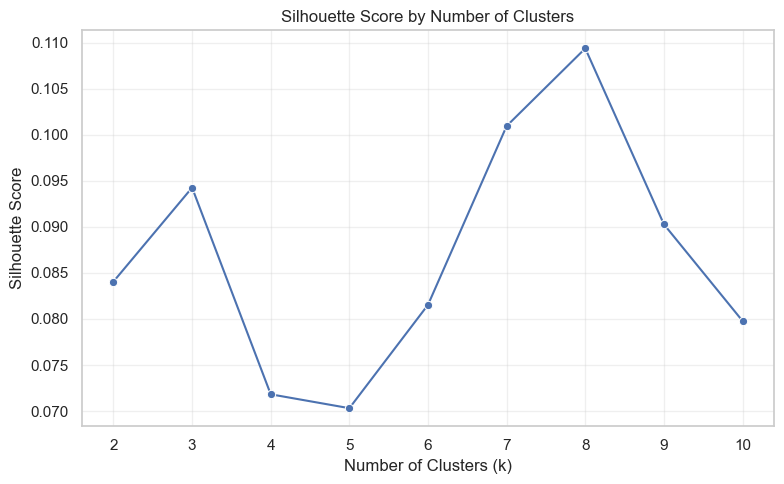

In [491]:
plt.figure(figsize=(8, 5))
sns.lineplot(x=list(k_range), y=sil_scores, marker='o')
plt.title("Silhouette Score by Number of Clusters")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [505]:
# Choose the k with the highest silhouette score
optimal_k = k_range[sil_scores.index(max(sil_scores))]
print(f"Optimal number of clusters: {optimal_k}")

# Final KMeans model
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
cluster_labels = final_kmeans.fit_predict(X_cluster_scaled)

# Add cluster labels to df_clean
df_clean['Cluster'] = cluster_labels

# Assign descriptive labels to each cluster
cluster_labels = {
    0: "Young Entry-Level",
    1: "Junior Admin",
    2: "Mid-Level Analysts",
    3: "Support Staff",
    4: "Senior Executives",
    5: "Skilled Technicians",
    6: "Experienced Managers",
    7: "Low Income, Low Tenure"
}

# Map to new column
df_clean['ClusterLabel'] = df_clean['Cluster'].map(cluster_labels)

Optimal number of clusters: 8


#### Visualize Clusters (PCA to 2D)

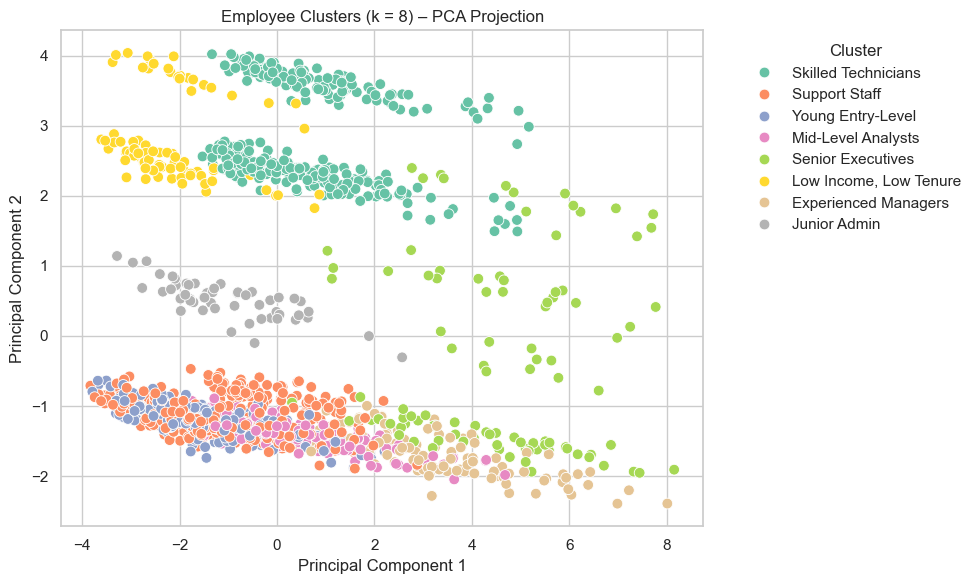

In [507]:
from sklearn.decomposition import PCA

# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster_scaled)

# Add PCA components and cluster label to a DataFrame
df_pca = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df_pca['Cluster'] = df_clean['Cluster']
df_pca['ClusterLabel'] = df_clean['ClusterLabel']

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=df_clean['ClusterLabel'], palette='Set2', s=60)
plt.title("Employee Clusters (k = 8) – PCA Projection")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [515]:
# Cluster label mapping
label_map = {
    0: "Young Entry-Level",
    1: "Junior Admin",
    2: "Mid-Level Analysts",
    3: "Support Staff",
    4: "Senior Executives",
    5: "Skilled Technicians",
    6: "Experienced Managers",
    7: "Low Income, Low Tenure"
}

# Create the summary with labeled index
cluster_summary = df_clean.groupby('Cluster')[[
    'Age', 'TotalWorkingYears', 'JobLevel', 'MonthlyIncome', 'OverTime'
]].mean().round(1)

# Rename index to use descriptive labels
cluster_summary.index = cluster_summary.index.map(label_map)

display(cluster_summary)

,Age,TotalWorkingYears,JobLevel,MonthlyIncome,OverTime
Cluster,,,,,
Young Entry-Level,34.0,7.5,1.2,3213.3,0.2
Junior Admin,35.5,8.2,1.5,4235.8,0.2
Mid-Level Analysts,38.2,12.6,2.4,7252.7,0.3
Support Staff,35.4,8.8,1.5,4158.0,0.3
Senior Executives,46.9,24.7,4.3,17149.5,0.3
Skilled Technicians,36.8,11.0,2.3,6902.9,0.3
Experienced Managers,44.5,22.2,3.8,14686.8,0.3
"Low Income, Low Tenure",30.4,4.7,1.1,2626.0,0.3


### Task 4 Summary: Unsupervised Clustering with K-Means
In this task, we applied unsupervised learning to uncover natural groupings within the employee data. Using the K-Means algorithm, we tested different values of k and evaluated the quality of each clustering configuration using the silhouette score. The highest silhouette score was observed at **k = 8**, so we chose to segment the employees into 8 distinct clusters.

To better understand and visualize these clusters, we used Principal Component Analysis (PCA) to reduce the dataset to two dimensions. This allowed us to project the clusters into a 2D space and inspect how well the groups were separated. The resulting PCA scatter plot showed clear visual distinctions between most clusters, confirming that the segmentation was meaningful.

We then examined the average values for key attributes such as age, total working years, job level, monthly income, and overtime across each cluster. Based on this information, we assigned descriptive labels to the clusters to reflect their most defining characteristics:

**Cluster 0** – Young Entry-Level: Lower job level and salary, with moderate age and working years.

**Cluster 1** – Junior Admin: Slightly older, slightly higher income, but still low-level roles.

**Cluster 2** – Mid-Level Analysts: Moderate age and salary, suggesting mid-career professionals.

**Cluster 3** – Support Staff: Similar to Cluster 1, but slightly more experienced and stable.

**Cluster 4** – Senior Executives: Highest salary, longest tenure, and most advanced job level.

**Cluster 5** – Skilled Technicians: Experienced and well-compensated, possibly in niche roles.

**Cluster 6** – Experienced Managers: High job level and income with extensive work experience.

**Cluster 7** – Low Income, Low Tenure: Youngest group, lowest income and shortest working years.

These clusters provide insight into different employee personas within the company. For example, Cluster 4 may represent key decision-makers, while Clusters 0 and 7 likely include more junior staff. This segmentation could be valuable for tailoring communication, identifying retention risks, or planning targeted development programs.

----------------